# Customer Segmentation to Understand Their Purchasing Behaviour

## Goal & Scope

**GOAL**: We are trying to better understand the customers of shop and segment them acccording to their behaviours.

**SCOPE**: Our aim is to segment customers based on their attributes to identity their purchasing behaviour..

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import DBSCAN
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.decomposition import PCA

from sklearn.metrics import silhouette_score

## Reading Data

In [2]:
df = pd.read_csv('G:/Study material/Data Science/Projects/Unsupervised Learning/Customers.csv')

df.head()

CustomerID  Gender  Age  Annual Income ($)  Spending Score (1-100)  \
0           1    Male   19              15000                      39   
1           2    Male   21              35000                      81   
2           3  Female   20              86000                       6   
3           4  Female   23              59000                      77   
4           5  Female   31              38000                      40   

      Profession  Work Experience  Family Size  
0     Healthcare                1            4  
1       Engineer                3            3  
2       Engineer                1            1  
3         Lawyer                0            2  
4  Entertainment                2            6

In [3]:
df.shape

(2000, 8)

This Customers Data is a comprehensive dataset that provides a detailed analysis of a hypothetical shop's ideal customers. By collecting and analyzing customer data through membership cards, this dataset provides valuable insights that can help a business better understand its customers.

This dataset includes 2000 records and 8 columns. It consists attributes of customers such as gender, age, income, spending, etc. 

Here our aim is to segment customers based on their attributes to identity their purchasing behaviour.

* **Customer ID**: A unique identifier assigned to each customer in the dataset. 

* **Gender**: The gender of the customer, either male or female. Gender can be used to analyze purchasing behavior and preferences between genders.

* **Age**: The age of the customer, usually measured in years. Age can be used to segment customers into different age groups, which can help identify purchasing patterns and preferences among different age groups.

* **Annual Income**: The annual income of the customer, usually measured in dollars or another currency. Annual income can be used to segment customers into different income groups, which can help identify purchasing patterns and preferences among different income levels.

* **Spending Score**: A score assigned by the shop based on the customer's behavior and spending nature. This score can be used to segment customers based on their purchasing patterns, such as high-spending customers, low-spending customers, and customers who are likely to make impulse purchases.

* **Profession**: The occupation or profession of the customer. Profession can be used to analyze purchasing patterns and preferences among different professions.

* **Work Experience**: The number of years of work experience of the customer. This feature can be used to segment customers based on their level of experience, which can help identify purchasing patterns and preferences among different experience levels.

* **Family Size**: The size of the customer's family, usually measured in terms of the number of family members. Family size can be used to analyze purchasing patterns and preferences among different family sizes, such as families with children versus families without children.

## Problem Statement

**Segment the customers to understand their purchasing behaviour for marketing strategy.**

## Missing value

In [4]:
df.isna().mean()

CustomerID                0.0000
Gender                    0.0000
Age                       0.0000
Annual Income ($)         0.0000
Spending Score (1-100)    0.0000
Profession                0.0175
Work Experience           0.0000
Family Size               0.0000
dtype: float64

In [5]:
df['Profession'].value_counts()

Profession
Artist           612
Healthcare       339
Entertainment    234
Engineer         179
Doctor           161
Executive        153
Lawyer           142
Marketing         85
Homemaker         60
Name: count, dtype: int64

* We have only 0.017 percent missing data, therefore we are dropping missing values.

In [6]:
df = df.dropna()

df.isna().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income ($)         0
Spending Score (1-100)    0
Profession                0
Work Experience           0
Family Size               0
dtype: int64

In [7]:
## CustomerID column is not useful for modeling

df.drop('CustomerID', axis=1, inplace=True)

df.head()

Gender  Age  Annual Income ($)  Spending Score (1-100)     Profession  \
0    Male   19              15000                      39     Healthcare   
1    Male   21              35000                      81       Engineer   
2  Female   20              86000                       6       Engineer   
3  Female   23              59000                      77         Lawyer   
4  Female   31              38000                      40  Entertainment   

   Work Experience  Family Size  
0                1            4  
1                3            3  
2                1            1  
3                0            2  
4                2            6

## Data Exploration

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1965 entries, 0 to 1999
Data columns (total 7 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Gender                  1965 non-null   object
 1   Age                     1965 non-null   int64 
 2   Annual Income ($)       1965 non-null   int64 
 3   Spending Score (1-100)  1965 non-null   int64 
 4   Profession              1965 non-null   object
 5   Work Experience         1965 non-null   int64 
 6   Family Size             1965 non-null   int64 
dtypes: int64(5), object(2)
memory usage: 122.8+ KB


In [9]:
df.describe()

Age  Annual Income ($)  Spending Score (1-100)  \
count  1965.000000        1965.000000             1965.000000   
mean     48.894656      110616.009669               51.078880   
std      28.414889       45833.860195               27.977176   
min       0.000000           0.000000                0.000000   
25%      25.000000       74350.000000               28.000000   
50%      48.000000      109759.000000               50.000000   
75%      73.000000      149095.000000               75.000000   
max      99.000000      189974.000000              100.000000   

       Work Experience  Family Size  
count      1965.000000  1965.000000  
mean          4.092621     3.757252  
std           3.926459     1.968335  
min           0.000000     1.000000  
25%           1.000000     2.000000  
50%           3.000000     4.000000  
75%           7.000000     5.000000  
max          17.000000     9.000000

In [10]:
## Exploring numberical variables

def num_variable_analysis(data):
    
    plt.figure(figsize=(10, 7))
    columns = df.select_dtypes(exclude='O').columns
    
    for i, col in enumerate(columns):     
        ax = plt.subplot(3, 2, i+1)
        sns.histplot(data[col], ax=ax, kde=True)
        plt.xticks(rotation=45)
        sns.despine()
        ax.set_title(f'Distribution of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Frequency')
        
    plt.tight_layout()
    plt.show()

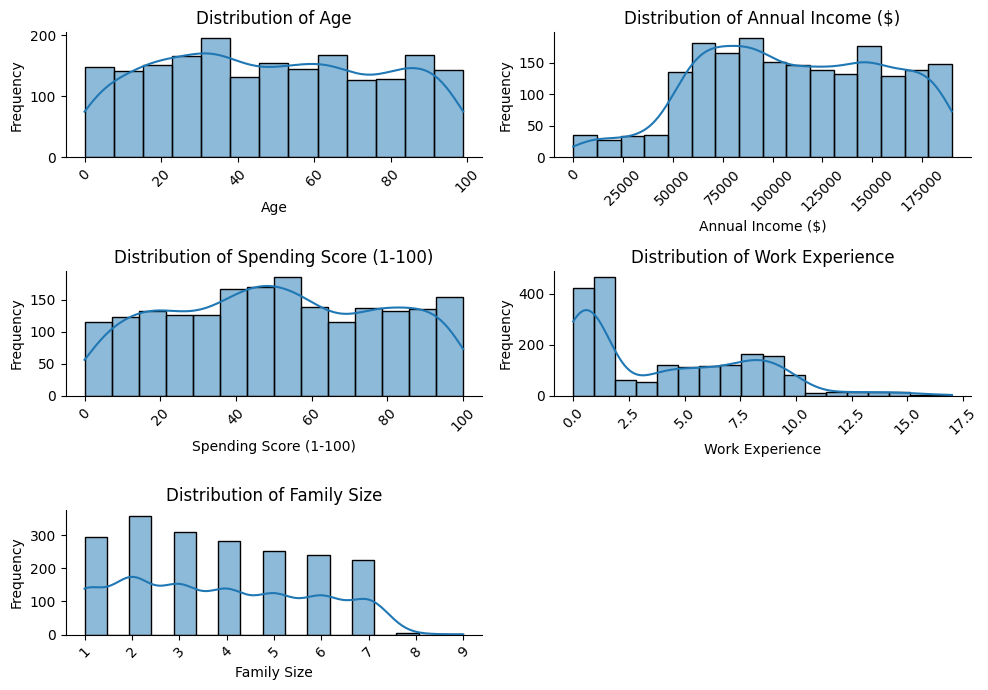

In [11]:
num_variable_analysis(df)

* For `Work Experience` and `Family Size` data is a little bit of rightly skewed.
* Data is distributed well for all the variables.


In [12]:
## Exploring categorical variables

def cat_variable_analysis(data):
    plt.figure(figsize=(10, 4))
    columns = df.select_dtypes(include='O')
    
    for i, col in enumerate(columns):
        ax = plt.subplot(1, 2, i+1)
        sns.countplot(x=data[col])
        plt.xticks(rotation=90)
        sns.despine()
        ax.set_title(f'Countplot of {col}')
        ax.set_xlabel(col)
        ax.set_ylabel('Count of each category')
        
    plt.tight_layout()
    plt.show()

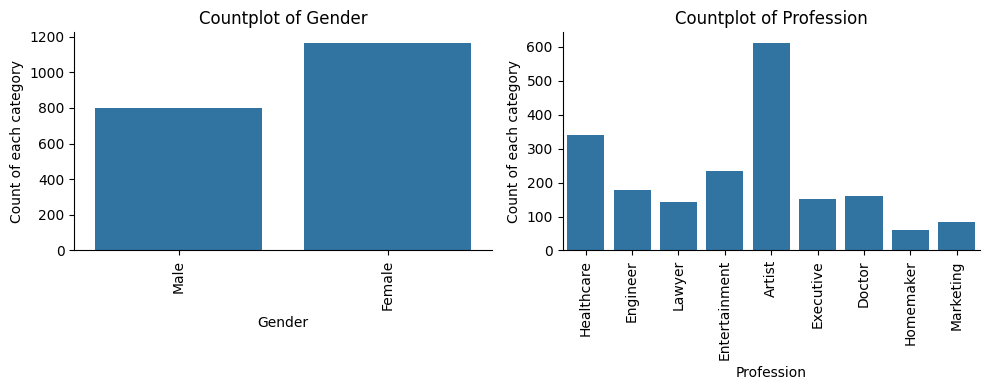

In [13]:
cat_variable_analysis(df)

* Good number of count across all the categories for both variables.

## Converting categorical variable into Numberic

* We have two categorical variables and both are nominal categorical type.
* Here we will use `OneHotEncoder` to convert them into numeric.

In [14]:
cat_columns = df.select_dtypes(include='O')

encoder = OneHotEncoder(sparse_output=False)

encoding_data = encoder.fit_transform(cat_columns)

encoding_df = pd.DataFrame(encoding_data, columns=encoder.get_feature_names_out(cat_columns.columns))

encoding_df.head()

Gender_Female  Gender_Male  Profession_Artist  Profession_Doctor  \
0            0.0          1.0                0.0                0.0   
1            0.0          1.0                0.0                0.0   
2            1.0          0.0                0.0                0.0   
3            1.0          0.0                0.0                0.0   
4            1.0          0.0                0.0                0.0   

   Profession_Engineer  Profession_Entertainment  Profession_Executive  \
0                  0.0                       0.0                   0.0   
1                  1.0                       0.0                   0.0   
2                  1.0                       0.0                   0.0   
3                  0.0                       0.0                   0.0   
4                  0.0                       1.0                   0.0   

   Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
0                    1.0                   0.0                0.0   
1                    0.0                   0.0                0.0   
2                    0.0                   0.0                0.0   
3                    0.0                   0.0                1.0   
4                    0.0                   0.0                0.0   

   Profession_Marketing  
0                   0.0  
1                   0.0  
2                   0.0  
3                   0.0  
4                   0.0

In [15]:
df2 = pd.concat([df, encoding_df], axis=1).drop(['Gender', 'Profession'], axis=1)
df2.head()

Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0  19.0            15000.0                    39.0              1.0   
1  21.0            35000.0                    81.0              3.0   
2  20.0            86000.0                     6.0              1.0   
3  23.0            59000.0                    77.0              0.0   
4  31.0            38000.0                    40.0              2.0   

   Family Size  Gender_Female  Gender_Male  Profession_Artist  \
0          4.0            0.0          1.0                0.0   
1          3.0            0.0          1.0                0.0   
2          1.0            1.0          0.0                0.0   
3          2.0            1.0          0.0                0.0   
4          6.0            1.0          0.0                0.0   

   Profession_Doctor  Profession_Engineer  Profession_Entertainment  \
0                0.0                  0.0                       0.0   
1                0.0                  1.0                       0.0   
2                0.0                  1.0                       0.0   
3                0.0                  0.0                       0.0   
4                0.0                  0.0                       1.0   

   Profession_Executive  Profession_Healthcare  Profession_Homemaker  \
0                   0.0                    1.0                   0.0   
1                   0.0                    0.0                   0.0   
2                   0.0                    0.0                   0.0   
3                   0.0                    0.0                   0.0   
4                   0.0                    0.0                   0.0   

   Profession_Lawyer  Profession_Marketing  
0                0.0                   0.0  
1                0.0                   0.0  
2                0.0                   0.0  
3                1.0                   0.0  
4                0.0                   0.0

In [16]:
df2.shape

(2000, 16)

In [17]:
df2.dropna(inplace=True)

df2.isna().sum()

Age                         0
Annual Income ($)           0
Spending Score (1-100)      0
Work Experience             0
Family Size                 0
Gender_Female               0
Gender_Male                 0
Profession_Artist           0
Profession_Doctor           0
Profession_Engineer         0
Profession_Entertainment    0
Profession_Executive        0
Profession_Healthcare       0
Profession_Homemaker        0
Profession_Lawyer           0
Profession_Marketing        0
dtype: int64

## Feature Scaling

* We are scaling the variables because we don't have all the variable on the same scale
* We are using distance base models so we need to have all the variables on the same scale.

In [18]:
std = StandardScaler()

scaled_data = std.fit_transform(df2)

scaled_df = pd.DataFrame(scaled_data, columns=df2.columns)

scaled_df.head()

Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0 -1.049701          -2.078305               -0.427153        -0.772755   
1 -0.979277          -1.642790                1.074886        -0.263999   
2 -1.014489          -0.532228               -1.607326        -0.772755   
3 -0.908853          -1.120173                0.931835        -1.027133   
4 -0.627157          -1.577463               -0.391390        -0.518377   

   Family Size  Gender_Female  Gender_Male  Profession_Artist  \
0     0.122021      -1.209022     1.209022          -0.672473   
1    -0.386620      -1.209022     1.209022          -0.672473   
2    -1.403902       0.827115    -0.827115          -0.672473   
3    -0.895261       0.827115    -0.827115          -0.672473   
4     1.139303       0.827115    -0.827115          -0.672473   

   Profession_Doctor  Profession_Engineer  Profession_Entertainment  \
0          -0.300658            -0.315777                 -0.369637   
1          -0.300658             3.166792                 -0.369637   
2          -0.300658             3.166792                 -0.369637   
3          -0.300658            -0.315777                 -0.369637   
4          -0.300658            -0.315777                  2.705359   

   Profession_Executive  Profession_Healthcare  Profession_Homemaker  \
0             -0.288189               2.178083             -0.177578   
1             -0.288189              -0.459119             -0.177578   
2             -0.288189              -0.459119             -0.177578   
3             -0.288189              -0.459119             -0.177578   
4             -0.288189              -0.459119             -0.177578   

   Profession_Lawyer  Profession_Marketing  
0          -0.277505             -0.209302  
1          -0.277505             -0.209302  
2          -0.277505             -0.209302  
3           3.603541             -0.209302  
4          -0.277505             -0.209302

## KMeans Clustering

In [19]:
kmean = KMeans(n_clusters=2, n_init=100, random_state=42)

kmean.fit(scaled_df)

KMeans(n_clusters=2, n_init=100, random_state=42)

In [20]:
pd.Series(kmean.labels_).value_counts()

0    1146
1     784
Name: count, dtype: int64

In [21]:
kmean.cluster_centers_

array([[ 0.00672072, -0.00855771,  0.02266004, -0.01339504, -0.02355849,
         0.82711467, -0.82711467,  0.03040815, -0.01900431, -0.008849  ,
        -0.0154488 , -0.00944385, -0.01268177,  0.02010733,  0.00358313,
         0.00828407],
       [-0.00982391,  0.0125091 , -0.03312296,  0.01958   ,  0.03443626,
        -1.20902221,  1.20902221, -0.04444865,  0.02777926,  0.01293489,
         0.02258205,  0.01380441,  0.01853738, -0.02939158, -0.00523759,
        -0.01210911]])

In [22]:
kmean.inertia_

27009.547978733302

In [23]:
clusters = pd.DataFrame(kmean.cluster_centers_, columns=scaled_df.columns)
clusters

Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0  0.006721          -0.008558                0.022660        -0.013395   
1 -0.009824           0.012509               -0.033123         0.019580   

   Family Size  Gender_Female  Gender_Male  Profession_Artist  \
0    -0.023558       0.827115    -0.827115           0.030408   
1     0.034436      -1.209022     1.209022          -0.044449   

   Profession_Doctor  Profession_Engineer  Profession_Entertainment  \
0          -0.019004            -0.008849                 -0.015449   
1           0.027779             0.012935                  0.022582   

   Profession_Executive  Profession_Healthcare  Profession_Homemaker  \
0             -0.009444              -0.012682              0.020107   
1              0.013804               0.018537             -0.029392   

   Profession_Lawyer  Profession_Marketing  
0           0.003583              0.008284  
1          -0.005238             -0.012109

In [24]:
scaled_df.mean()

Age                        -3.681569e-17
Annual Income ($)          -2.945255e-17
Spending Score (1-100)      1.196510e-16
Work Experience            -4.786039e-17
Family Size                 4.417882e-17
Gender_Female              -4.049725e-17
Gender_Male                 4.049725e-17
Profession_Artist          -5.706431e-17
Profession_Doctor          -1.840784e-17
Profession_Engineer        -5.706431e-17
Profession_Entertainment   -2.945255e-17
Profession_Executive       -4.970118e-17
Profession_Healthcare       3.313412e-17
Profession_Homemaker        5.706431e-17
Profession_Lawyer          -1.656706e-17
Profession_Marketing        2.300980e-17
dtype: float64

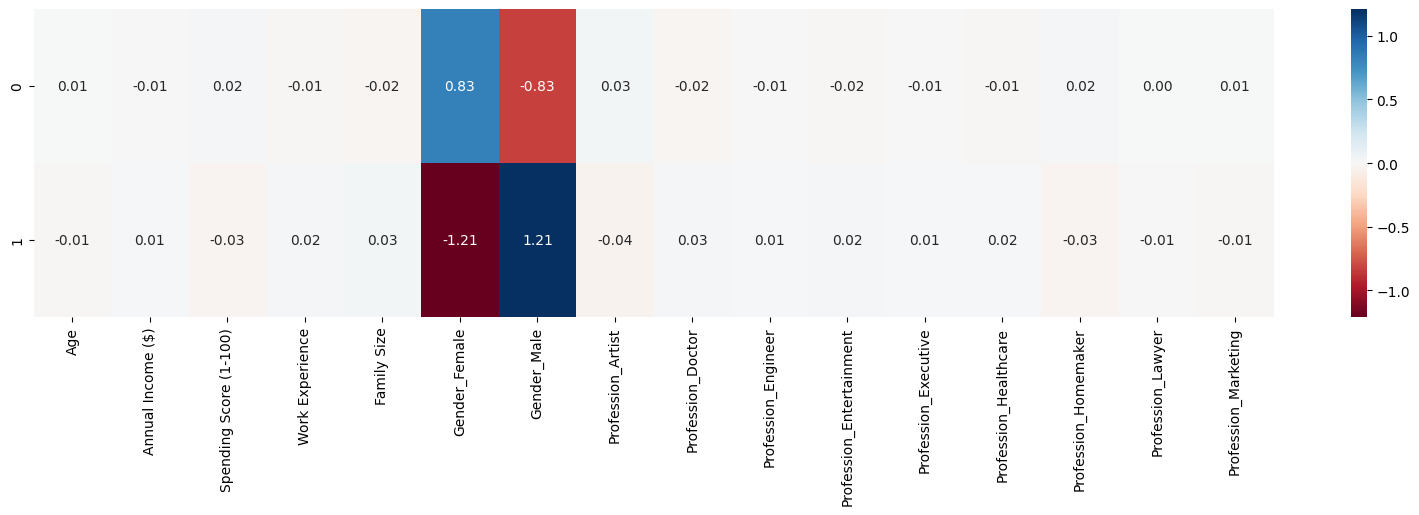

In [25]:
plt.figure(figsize=(20,4))

sns.heatmap(clusters, annot=True, fmt='0.2f', cmap='RdBu')
plt.show()

We clearly see the two cluster 
* **Cluster 1** : Female customers with more spending score, having low income and Artists, Homemakers, Lawyers and Marketing Professions.
* **Cluster 2** : Men customers with high income, having big family size and Doctor, Engineer, Entert., Executive and Healthcare Professions.

We will try to create more cluster using `Inertia Score` and `Silhouette Score`.

### Inertia Score

In [26]:
inertia_score = []

for i in range(2, 16):
    kmean = KMeans(n_clusters=i, n_init=10, random_state=42)
    kmean.fit(scaled_df)
    score = kmean.inertia_
    inertia_score.append(score)
    
inertia_score = pd.DataFrame(inertia_score, columns=['Inertia Score']).set_index(np.arange(2,16))

inertia_score

Inertia Score
2    27009.547979
3    25180.159672
4    23240.255943
5    21691.182216
6    19680.165647
7    17614.939022
8    16142.800327
9    13452.398310
10   12277.287156
11   11592.962209
12   11281.350419
13   10761.065896
14   10511.001784
15   10177.972538

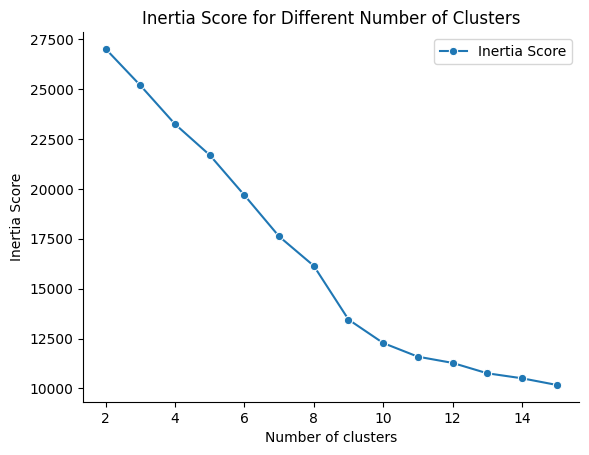

In [27]:
fig, ax = plt.subplots()

sns.lineplot(inertia_score, marker='o')
plt.title('Inertia Score for Different Number of Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia Score')
sns.despine()

* We are getting elbow at number 8 so we can use 8 cluster here to get better output.
* We will confirm it by using silhouette score 

In [28]:
score = []

for k in range(2,16):
    kmean = KMeans(n_clusters=k, n_init=10, random_state=42)
    kmean.fit(scaled_df)
    s_score = silhouette_score(scaled_df, kmean.labels_, metric='euclidean', sample_size=None)
    score.append(s_score)
    
score = pd.DataFrame(score, columns=['Silhouette_score'])

score.index = np.arange(2, 16)

score

Silhouette_score
2           0.137306
3           0.159527
4           0.172131
5           0.180544
6           0.215969
7           0.274052
8           0.271023
9           0.323724
10          0.290939
11          0.302950
12          0.269896
13          0.305007
14          0.271346
15          0.271285

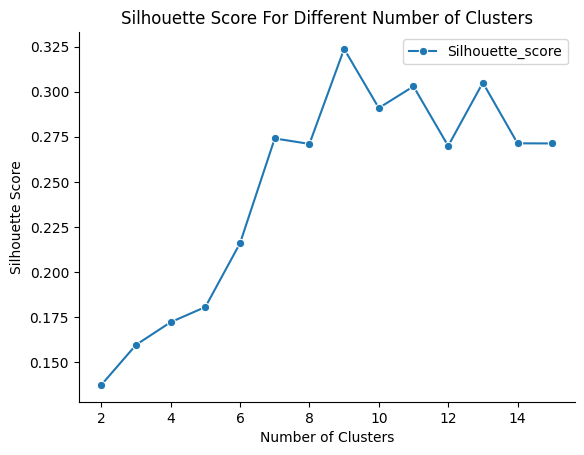

In [29]:
sns.lineplot(score, marker='o')
plt.title('Silhouette Score For Different Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
sns.despine()

* We are getting the best silhouette score for 8 clusters.

In [30]:
# Clusters = 8

kmean8 = KMeans(n_clusters=8, n_init=10, random_state=42)

kmean8.fit(scaled_df)

KMeans(n_init=10, random_state=42)

In [32]:
silhouette_score(scaled_df, kmean8.labels_, metric='euclidean', sample_size=None)

0.27102285925987585

In [33]:
pd.Series(kmean8.labels_).value_counts()

3    497
1    336
0    311
7    232
5    175
4    160
2    138
6     81
Name: count, dtype: int64

In [34]:
clusters8 = pd.DataFrame(kmean8.cluster_centers_, columns=scaled_df.columns)
clusters8

Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0  0.070064           0.015587               -0.037786         0.023914   
1 -0.049303           0.050435                0.029249        -0.071702   
2 -0.088260          -0.077264                0.066011         0.064111   
3  0.027772          -0.017097               -0.041461        -0.000409   
4  0.126380          -0.079567                0.022788         0.047613   
5  0.011086          -0.125609               -0.135737        -0.091022   
6 -0.089413           0.065688                0.134015        -0.047307   
7 -0.093816           0.115335                0.097728         0.086867   

   Family Size  Gender_Female  Gender_Male  Profession_Artist  \
0     0.045153      -1.209022     1.209022           0.910714   
1    -0.014222      -0.033396     0.033396          -0.672473   
2     0.059362       0.015611    -0.015611          -0.672473   
3    -0.035586       0.827115    -0.827115           0.948255   
4    -0.062361      -0.076421     0.076421          -0.672473   
5    -0.095968      -0.033880     0.033880          -0.672473   
6     0.115742       0.047852    -0.047852          -0.672473   
7     0.075980      -0.050531     0.050531          -0.672473   

   Profession_Doctor  Profession_Engineer  Profession_Entertainment  \
0          -0.300658            -0.315777                 -0.369637   
1          -0.300658            -0.315777                 -0.369637   
2          -0.300658            -0.315777                 -0.369637   
3          -0.300658            -0.315777                 -0.369637   
4           3.326034            -0.315777                 -0.369637   
5          -0.300658             3.166792                 -0.369637   
6          -0.300658            -0.315777                 -0.369637   
7          -0.300658            -0.315777                  2.705359   

   Profession_Executive  Profession_Healthcare  Profession_Homemaker  \
0              0.473106              -0.459119              0.195985   
1             -0.288189               2.178083             -0.177578   
2             -0.288189              -0.459119             -0.177578   
3              0.354551              -0.459119              0.278252   
4             -0.288189              -0.459119             -0.177578   
5             -0.288189              -0.459119             -0.177578   
6             -0.288189              -0.459119             -0.177578   
7             -0.288189              -0.459119             -0.177578   

   Profession_Lawyer  Profession_Marketing  
0          -0.277505             -0.209302  
1          -0.277505             -0.209302  
2           3.603541             -0.209302  
3          -0.277505             -0.209302  
4          -0.277505             -0.209302  
5          -0.277505             -0.209302  
6          -0.277505              4.777778  
7          -0.277505             -0.209302

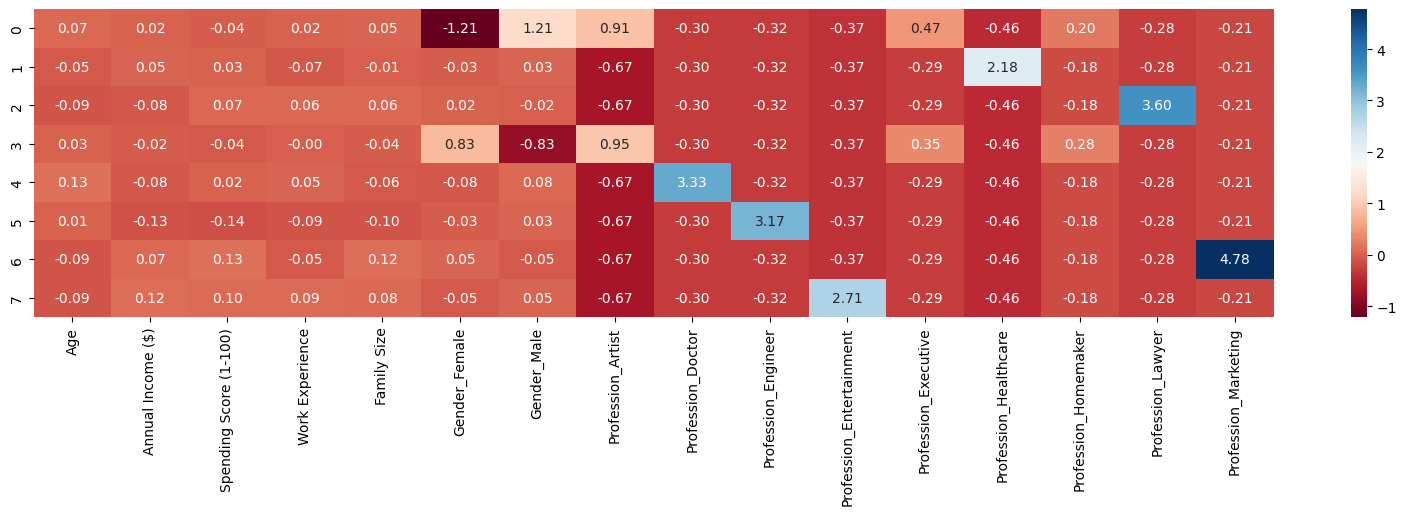

In [36]:
plt.figure(figsize=(20,4))
sns.heatmap(clusters8, annot=True, fmt='0.2f', cmap='RdBu')
plt.show()

Here we can see clear cluster based on professions

* **Cluster 1**: Female Artist with median income, age and family
* **Cluster 2**: Healthcare profession's men with above average income, good spending score and low age.
* **Cluster 3**: Engineers and Homemakers with low income and spending score.
* **Cluster 4**: Old male doctors with low income and fewer family members.
* **Cluster 5**: Male entertainment professionals with high income & spending score and less work experience & family members.
* **Cluster 6**: Male executives with more work experience and age.
* **Cluster 7**: Marketing women with high income and spending score.
* **Cluster 8**: Women Lawyers with low income but high spending score.

These are the clusters I have identified.


In [37]:
def k_mean_clustering(data):
    for k in range(2, 11):
        plt.figure(figsize=(20,4))
        print(f'## Number of Clusters = {k}', '\n')
        kmean = KMeans(n_clusters=k, n_init=10, random_state=42)
        kmean.fit(data)
        print(f'##Labels')
        labels = pd.Series(kmean.labels_).value_counts()
        print(labels, '\n')
        clusters = pd.DataFrame(kmean.cluster_centers_, columns=data.columns)
        sns.heatmap(clusters, annot=True, fmt='0.2f', cmap='RdBu')
        plt.show()
        score = silhouette_score(data, kmean.labels_, metric='euclidean', sample_size=None)
        print(f'Silhouette Score = {score}', '\n')

## Number of Clusters = 2 

##Labels
0    1146
1     784
Name: count, dtype: int64 



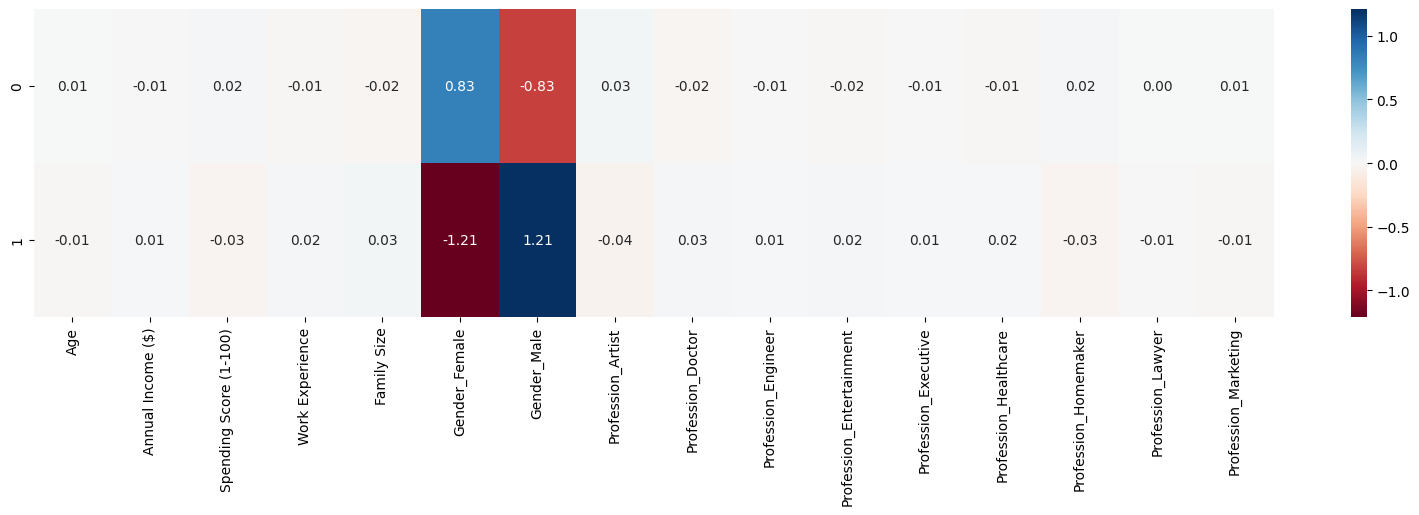

Silhouette Score = 0.13730636138788568 

## Number of Clusters = 3 

##Labels
2    1063
0     729
1     138
Name: count, dtype: int64 



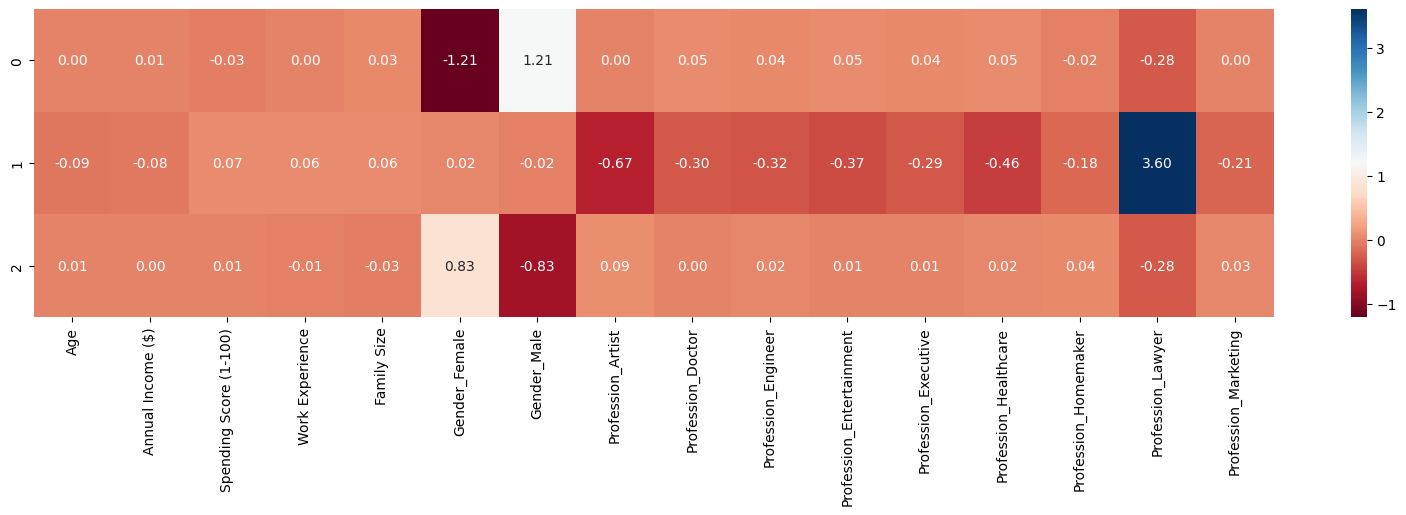

Silhouette Score = 0.15952724143049304 

## Number of Clusters = 4 

##Labels
3    1057
1     733
2      81
0      59
Name: count, dtype: int64 



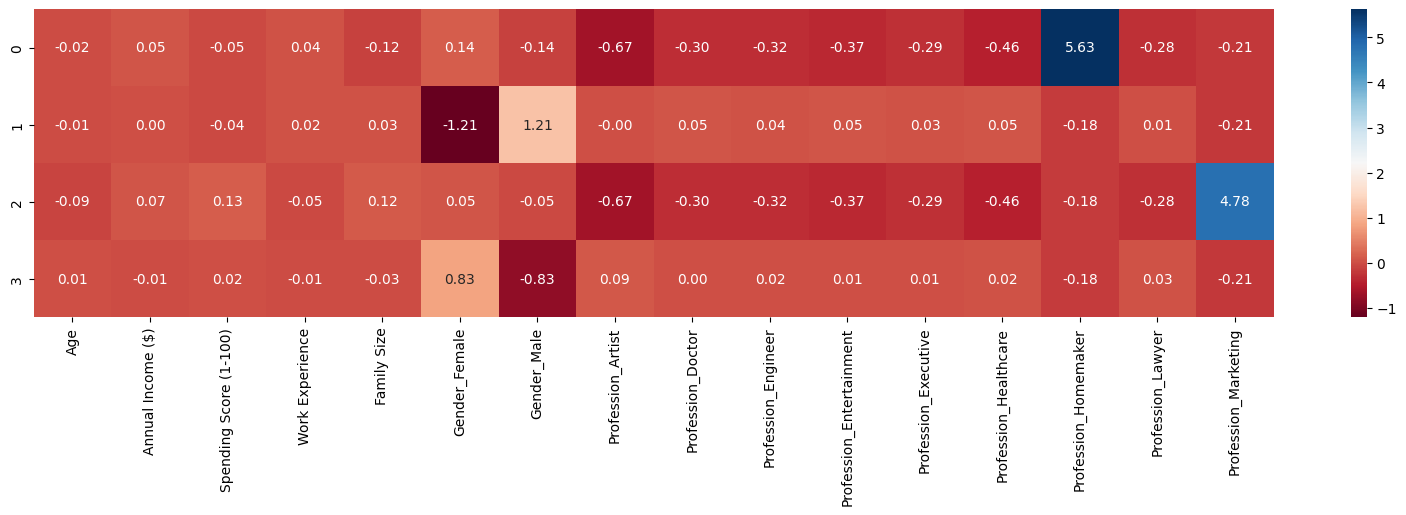

Silhouette Score = 0.17213100220865882 

## Number of Clusters = 5 

##Labels
4    770
2    511
3    336
1    232
0     81
Name: count, dtype: int64 



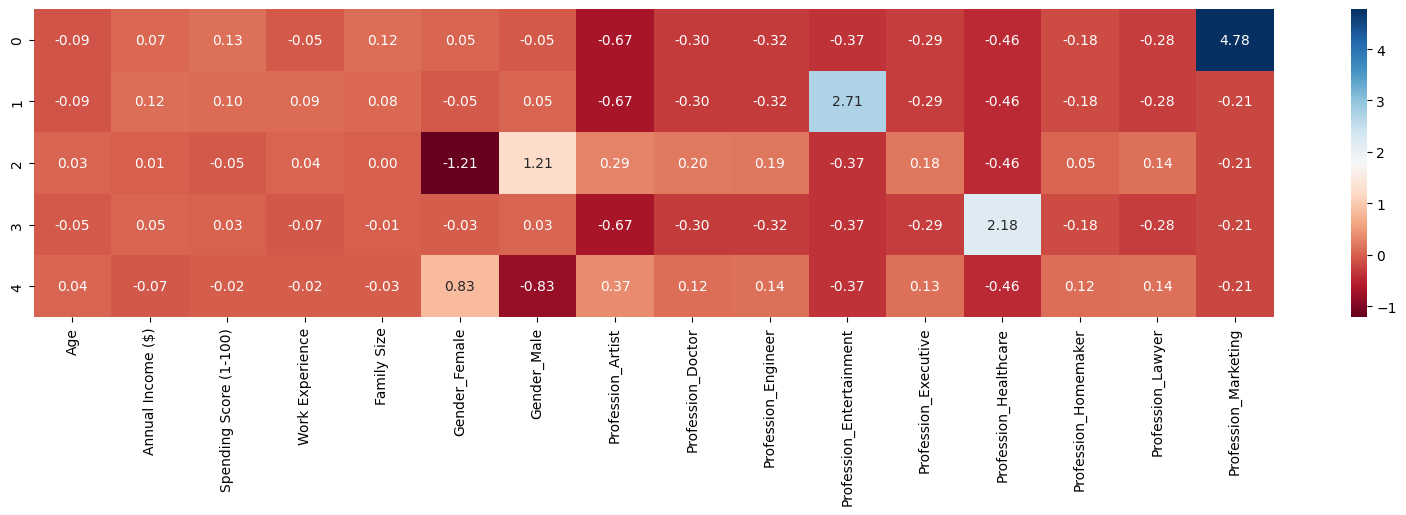

Silhouette Score = 0.18054358271074183 

## Number of Clusters = 6 

##Labels
2    601
1    542
0    336
3    232
4    138
5     81
Name: count, dtype: int64 



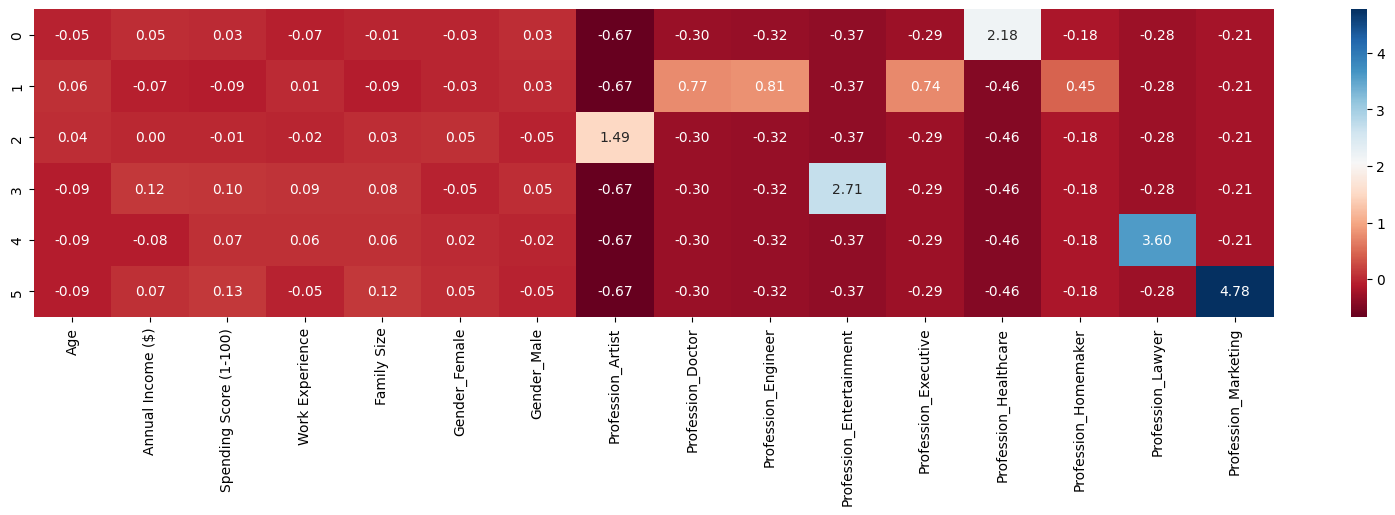

Silhouette Score = 0.2159689138088699 

## Number of Clusters = 7 

##Labels
3    741
2    336
4    232
6    175
5    160
1    148
0    138
Name: count, dtype: int64 



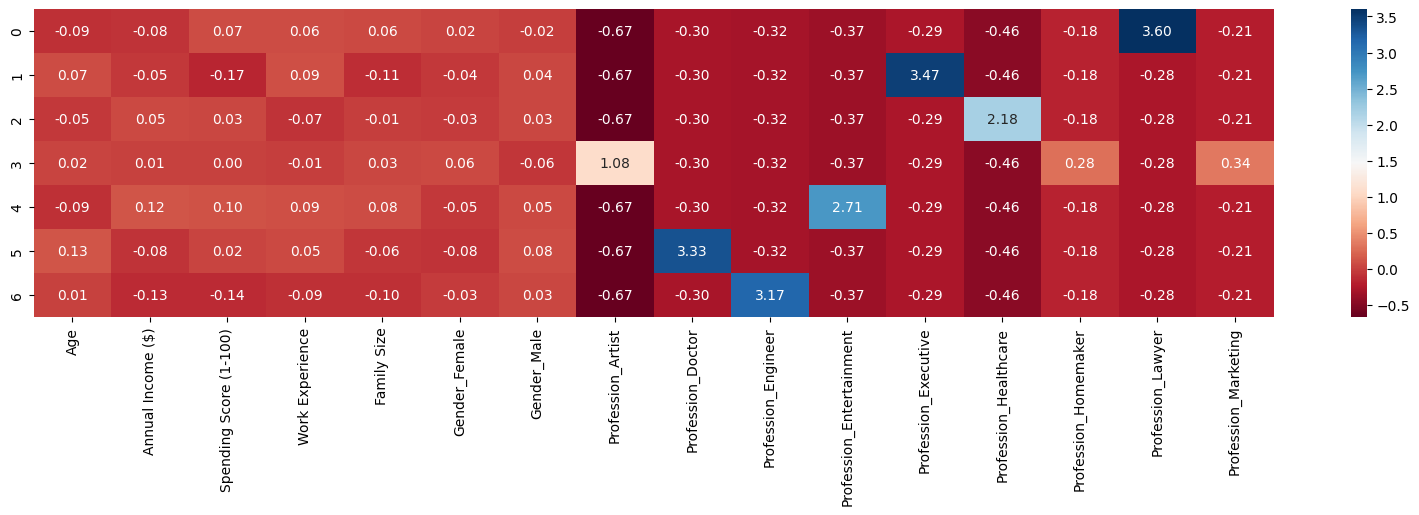

Silhouette Score = 0.2740522320692742 

## Number of Clusters = 8 

##Labels
3    497
1    336
0    311
7    232
5    175
4    160
2    138
6     81
Name: count, dtype: int64 



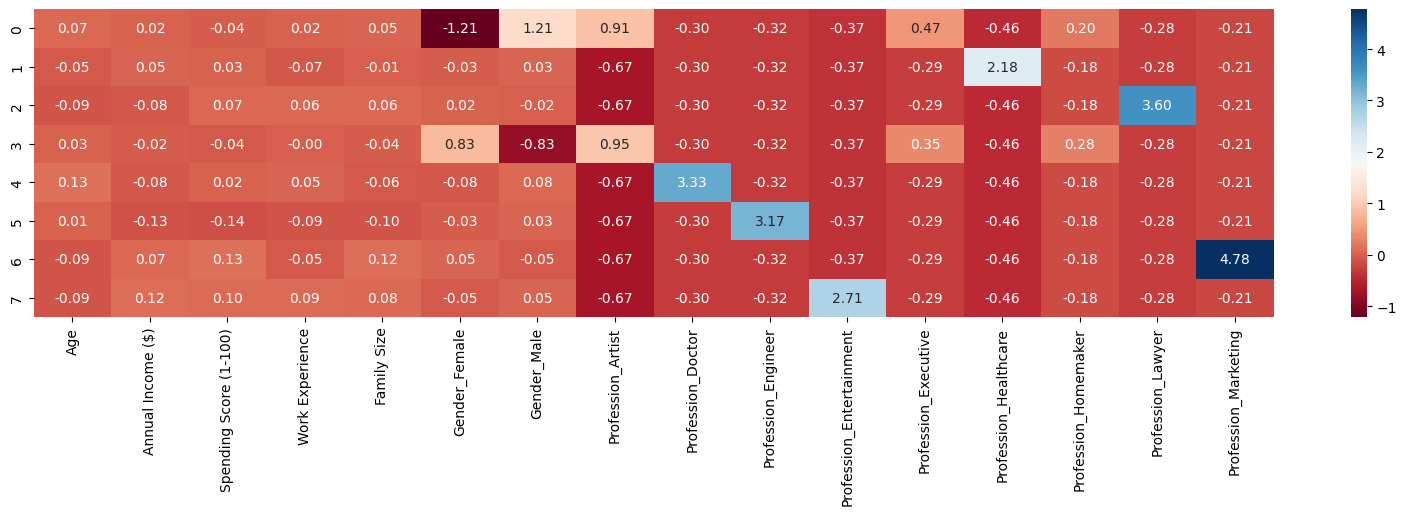

Silhouette Score = 0.27102285925987585 

## Number of Clusters = 9 

##Labels
2    601
3    336
6    232
7    175
5    160
4    148
0    138
1     81
8     59
Name: count, dtype: int64 



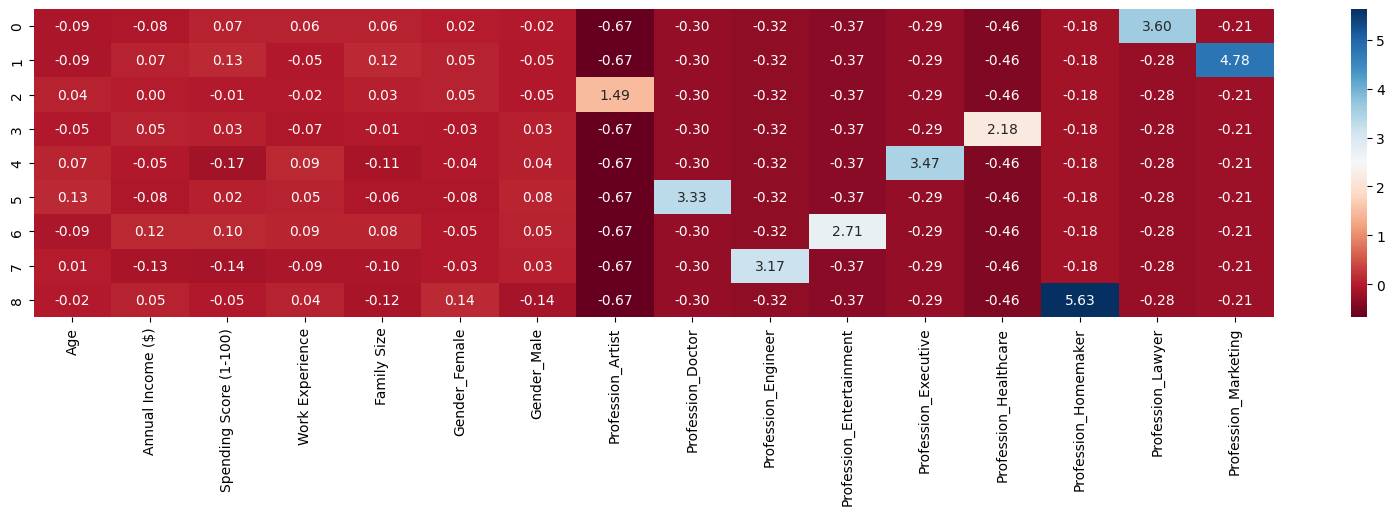

Silhouette Score = 0.3237241010226233 

## Number of Clusters = 10 

##Labels
2    373
3    336
8    232
0    228
6    175
1    160
7    148
4    138
9     81
5     59
Name: count, dtype: int64 



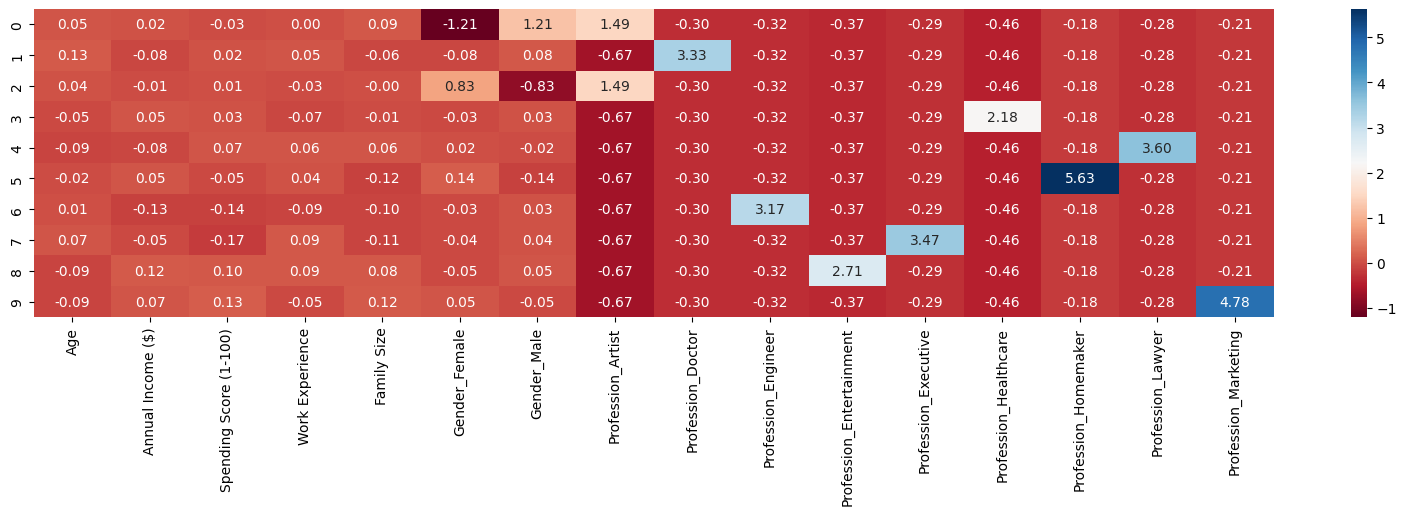

Silhouette Score = 0.2909389109328508 



In [38]:
k_mean_clustering(scaled_df)

`n_clusters = 2 and 8` are giving the best clusters.

## Hierarchical Clustering

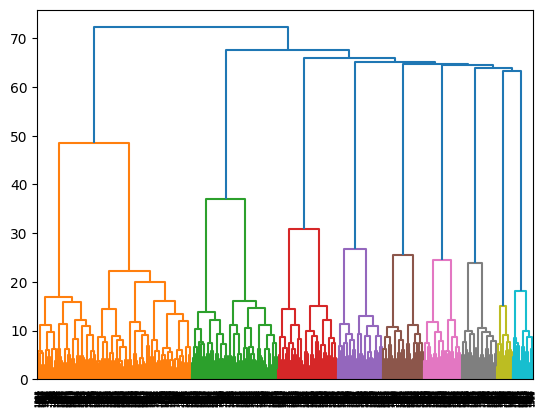

In [39]:
linkage_matrix = linkage(scaled_df, method='ward')

dendrogram_info = dendrogram(linkage_matrix)

In [40]:
agg = AgglomerativeClustering(n_clusters=2)

agg.fit(scaled_df)

AgglomerativeClustering()

In [41]:
pd.Series(agg.labels_).value_counts()

0    1329
1     601
Name: count, dtype: int64

In [42]:
df2 = scaled_df.copy()

df2['agg_clusters'] = agg.labels_

df2.head()

Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0 -1.049701          -2.078305               -0.427153        -0.772755   
1 -0.979277          -1.642790                1.074886        -0.263999   
2 -1.014489          -0.532228               -1.607326        -0.772755   
3 -0.908853          -1.120173                0.931835        -1.027133   
4 -0.627157          -1.577463               -0.391390        -0.518377   

   Family Size  Gender_Female  Gender_Male  Profession_Artist  \
0     0.122021      -1.209022     1.209022          -0.672473   
1    -0.386620      -1.209022     1.209022          -0.672473   
2    -1.403902       0.827115    -0.827115          -0.672473   
3    -0.895261       0.827115    -0.827115          -0.672473   
4     1.139303       0.827115    -0.827115          -0.672473   

   Profession_Doctor  Profession_Engineer  Profession_Entertainment  \
0          -0.300658            -0.315777                 -0.369637   
1          -0.300658             3.166792                 -0.369637   
2          -0.300658             3.166792                 -0.369637   
3          -0.300658            -0.315777                 -0.369637   
4          -0.300658            -0.315777                  2.705359   

   Profession_Executive  Profession_Healthcare  Profession_Homemaker  \
0             -0.288189               2.178083             -0.177578   
1             -0.288189              -0.459119             -0.177578   
2             -0.288189              -0.459119             -0.177578   
3             -0.288189              -0.459119             -0.177578   
4             -0.288189              -0.459119             -0.177578   

   Profession_Lawyer  Profession_Marketing  agg_clusters  
0          -0.277505             -0.209302             0  
1          -0.277505             -0.209302             0  
2          -0.277505             -0.209302             0  
3           3.603541             -0.209302             0  
4          -0.277505             -0.209302             0

In [43]:
agg_clusters = df2.groupby('agg_clusters').mean()

agg_clusters

Age  Annual Income ($)  Spending Score (1-100)  \
agg_clusters                                                        
0            -0.019359          -0.000338                0.003454   
1             0.042809           0.000747               -0.007639   

              Work Experience  Family Size  Gender_Female  Gender_Male  \
agg_clusters                                                             
0                    0.006839    -0.014612      -0.024723     0.024723   
1                   -0.015124     0.032311       0.054670    -0.054670   

              Profession_Artist  Profession_Doctor  Profession_Engineer  \
agg_clusters                                                              
0                     -0.672473           0.135964             0.142801   
1                      1.487049          -0.300658            -0.315777   

              Profession_Entertainment  Profession_Executive  \
agg_clusters                                                   
0                             0.167157              0.130325   
1                            -0.369637             -0.288189   

              Profession_Healthcare  Profession_Homemaker  Profession_Lawyer  \
agg_clusters                                                                   
0                          0.207623              0.080304           0.125493   
1                         -0.459119             -0.177578          -0.277505   

              Profession_Marketing  
agg_clusters                        
0                         0.094651  
1                        -0.209302

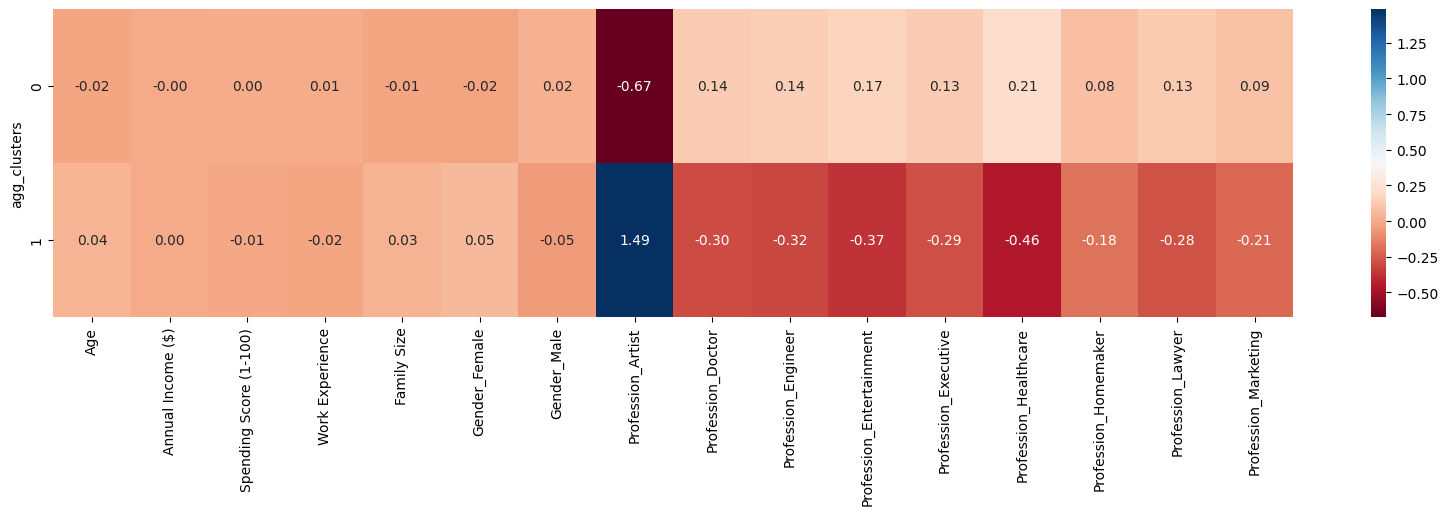

In [44]:
plt.figure(figsize=(20,4))
sns.heatmap(agg_clusters, annot=True, fmt='0.2f', cmap='RdBu')
plt.show()

* We can't define the clusters clearly

In [45]:
def agg_clustering(data):
    for k in range(2,10):
        plt.figure(figsize=(20,4))
        print(f'## Number of clusters={k}', '\n')
        agg = AgglomerativeClustering(n_clusters=k)
        agg.fit(data)
        print('## Labels')
        labels = pd.Series(agg.labels_).value_counts()
        print(labels, '\n')
        score = silhouette_score(data, agg.labels_, metric='euclidean', sample_size=None)
        print(f'Silhouette Score = {score}', '\n')
        
        data2 = data.copy()
        data2['clusters'] = agg.labels_
        clusters = data2.groupby('clusters').mean()
        sns.heatmap(clusters, annot=True, fmt='0.2f', cmap='RdBu')
        plt.show()

## Number of clusters=2 

## Labels
0    1329
1     601
Name: count, dtype: int64 

Silhouette Score = 0.06934890332495555 



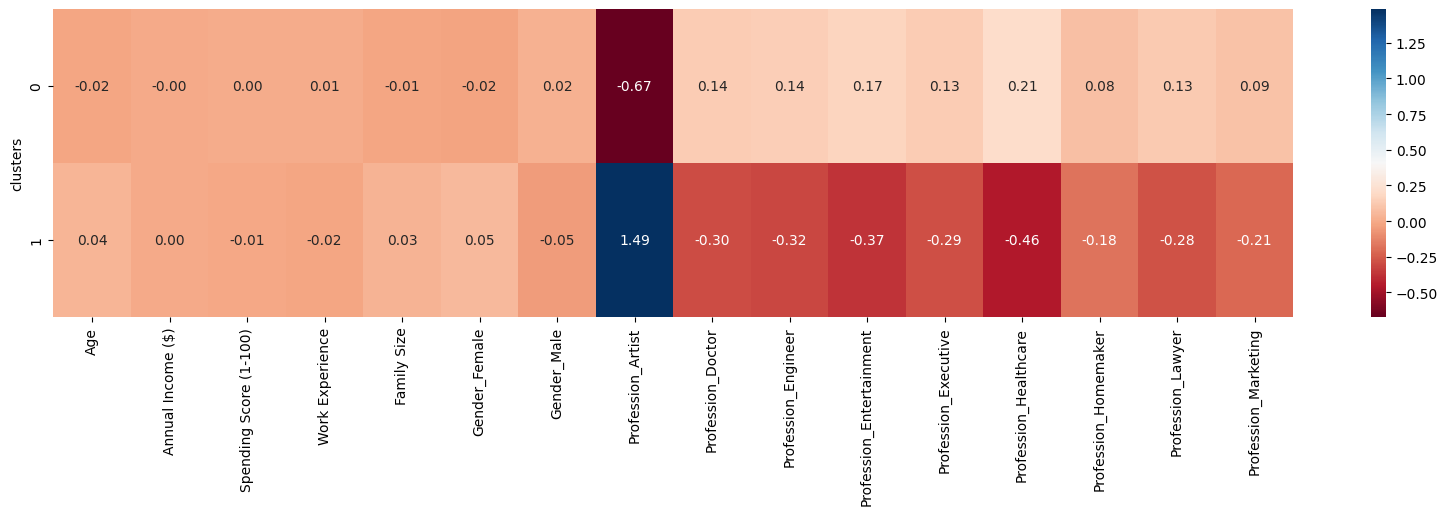

## Number of clusters=3 

## Labels
0    993
1    601
2    336
Name: count, dtype: int64 

Silhouette Score = 0.10387112123778157 



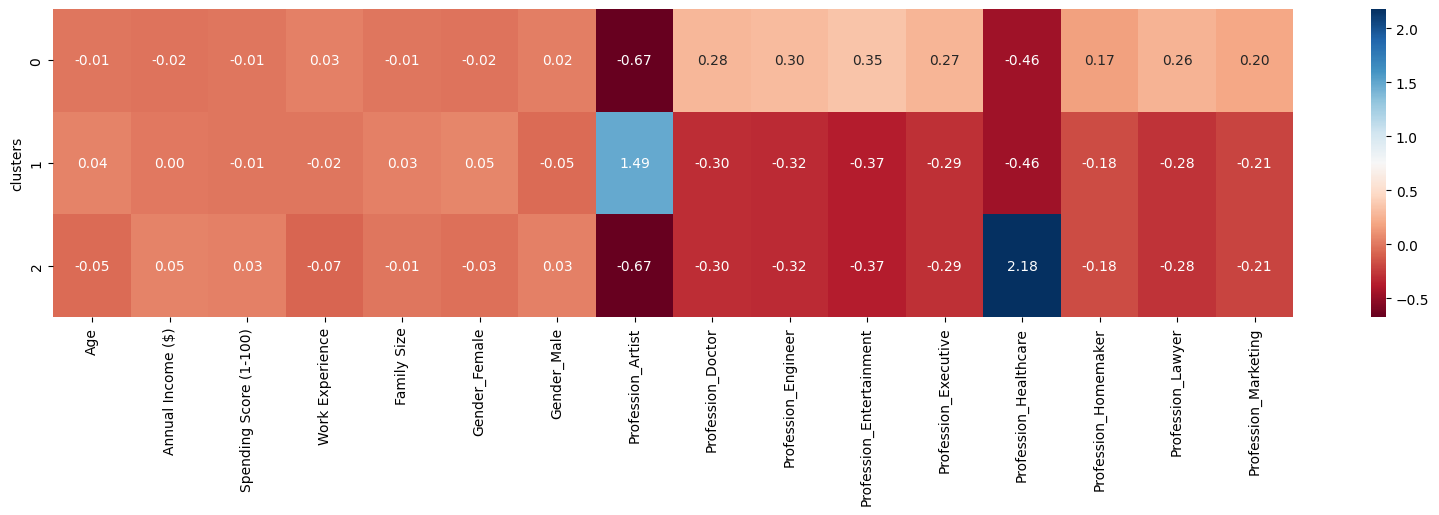

## Number of clusters=4 

## Labels
0    761
1    601
2    336
3    232
Name: count, dtype: int64 

Silhouette Score = 0.14993736688908352 



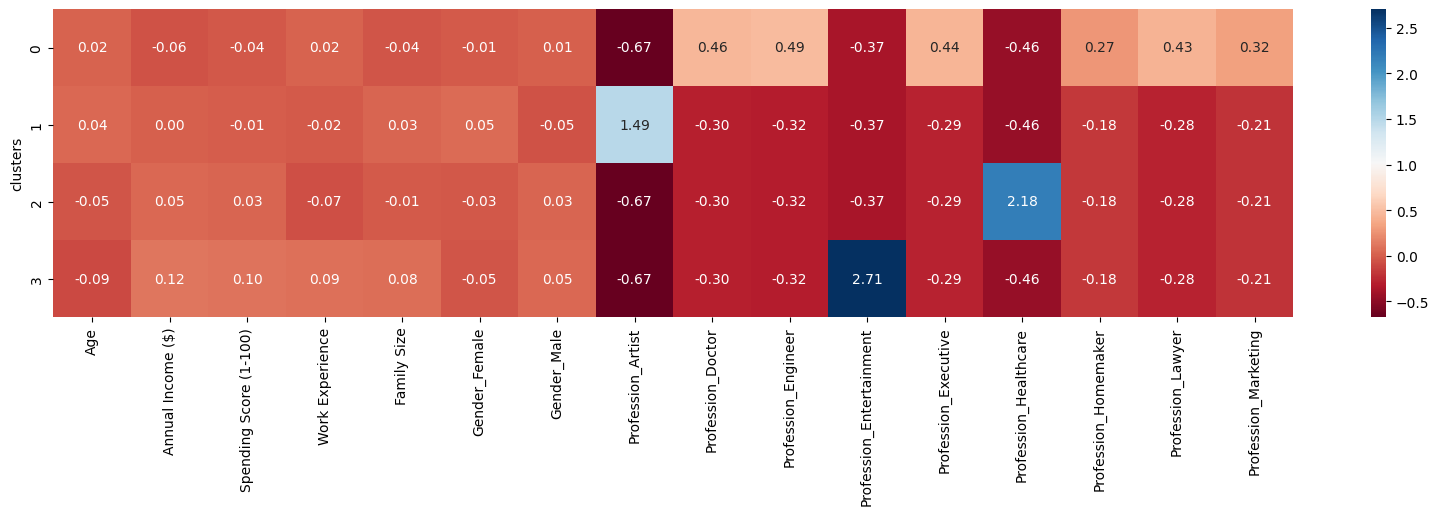

## Number of clusters=5 

## Labels
1    601
0    586
2    336
3    232
4    175
Name: count, dtype: int64 

Silhouette Score = 0.18966926629979342 



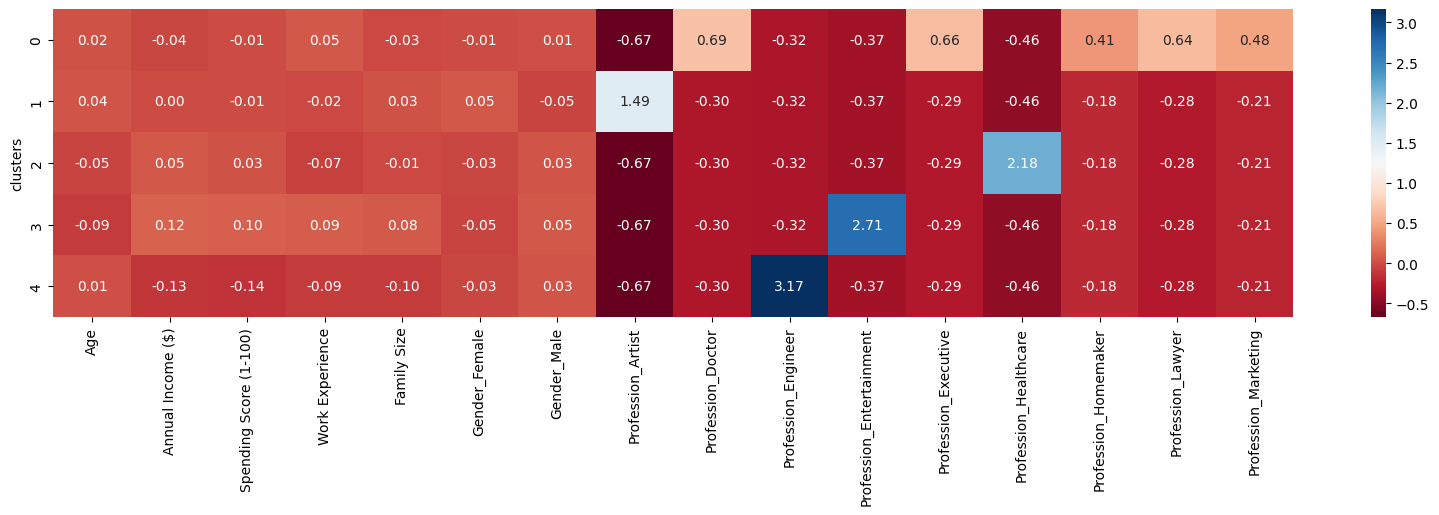

## Number of clusters=6 

## Labels
1    601
0    426
2    336
3    232
4    175
5    160
Name: count, dtype: int64 

Silhouette Score = 0.2283639026759059 



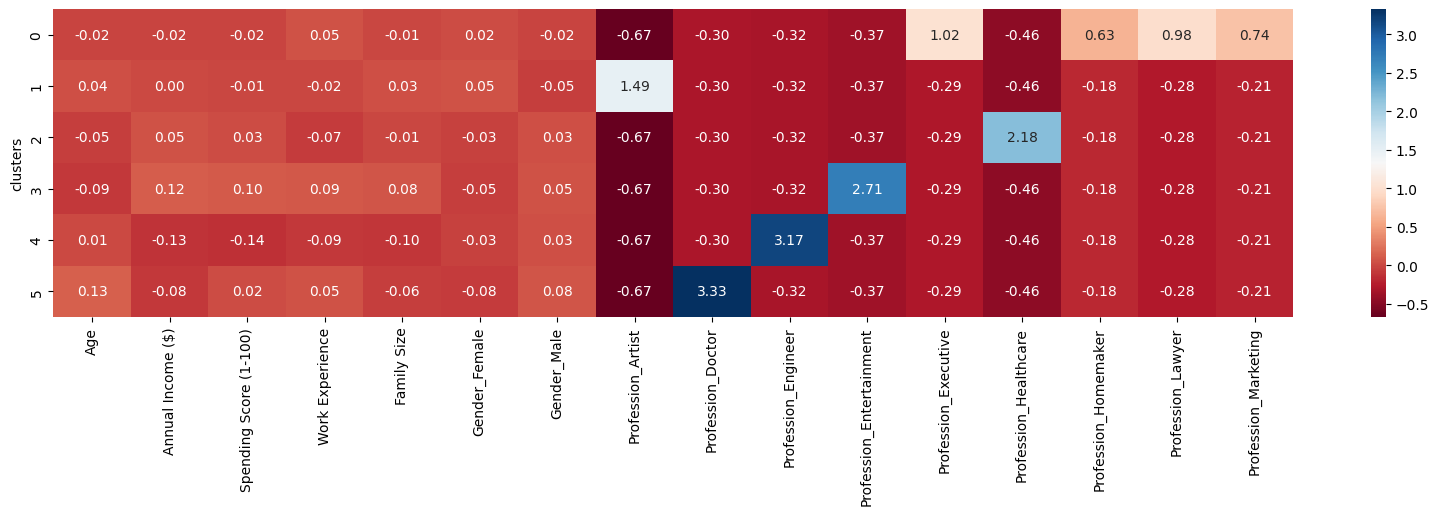

## Number of clusters=7 

## Labels
1    601
2    336
0    278
3    232
4    175
5    160
6    148
Name: count, dtype: int64 

Silhouette Score = 0.265344300826455 



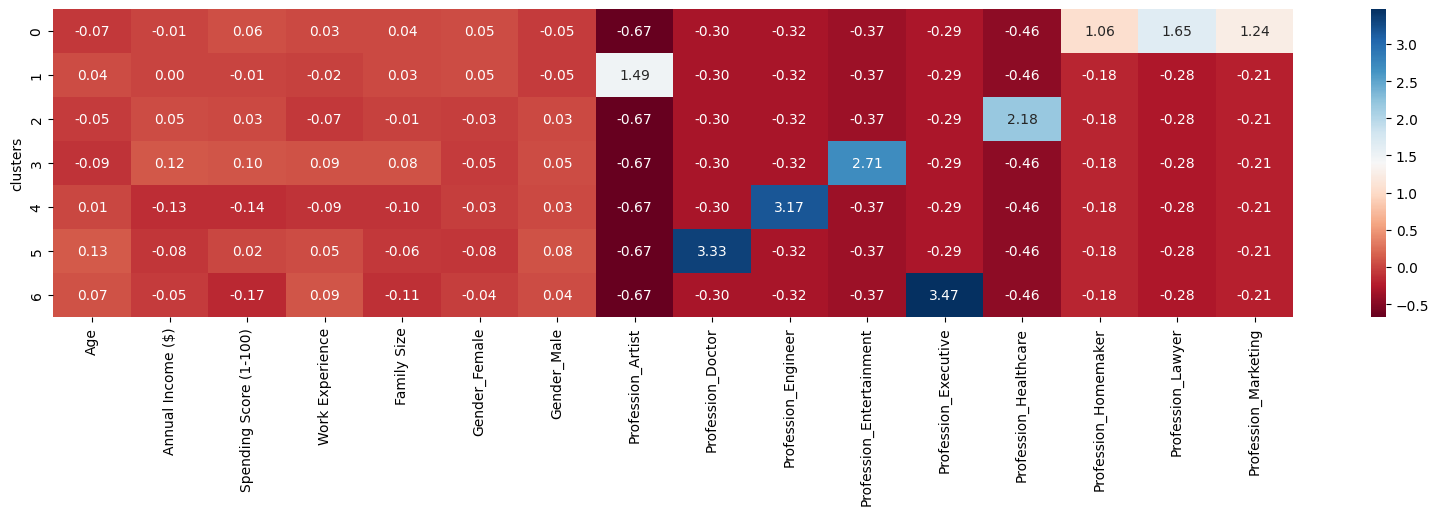

## Number of clusters=8 

## Labels
1    601
2    336
3    232
4    175
5    160
6    148
0    140
7    138
Name: count, dtype: int64 

Silhouette Score = 0.2984238877496671 



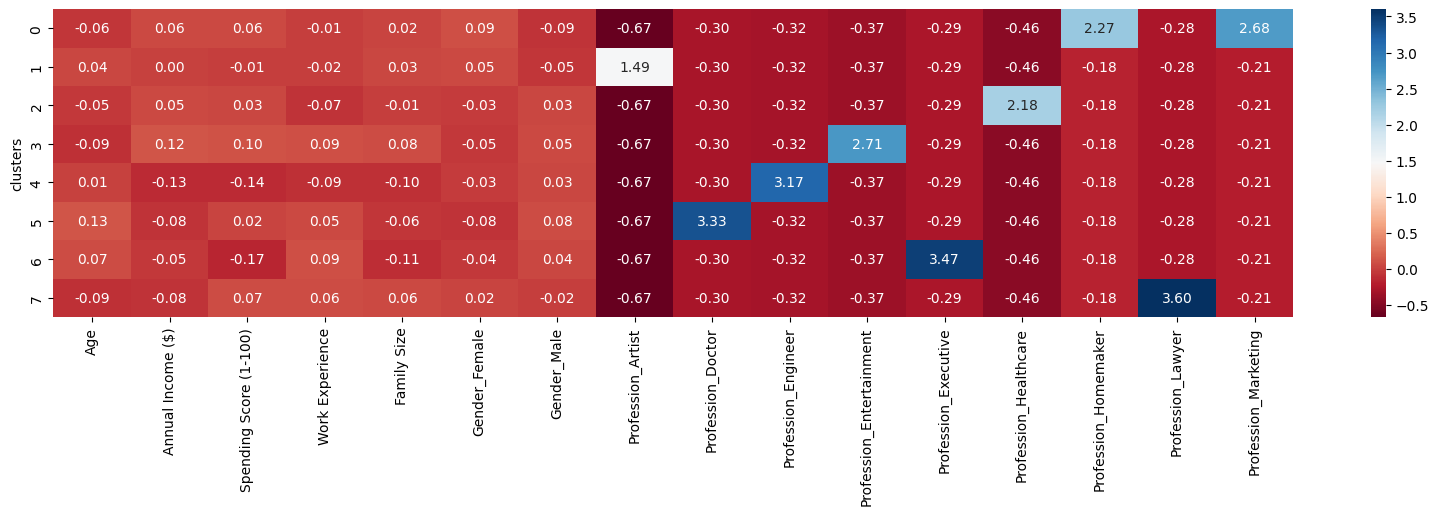

## Number of clusters=9 

## Labels
0    601
2    336
1    232
4    175
5    160
6    148
3    138
7     81
8     59
Name: count, dtype: int64 

Silhouette Score = 0.3237241010226233 



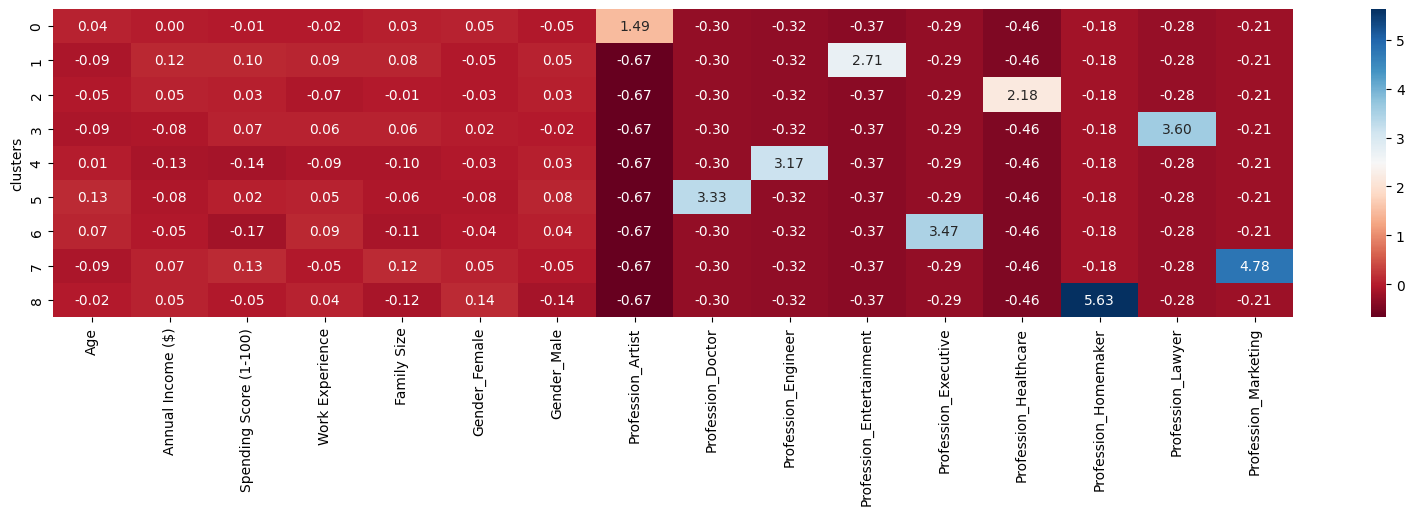

In [46]:
agg_clustering(scaled_df)

We have distinct group of customers when we divide them into 8 groups.

* **Cluster 1**: Marketing and homemaker profession's women with high income and spending score.
* **Cluster 2**: Artist women with moderate income, age and family size.
* **Cluster 3**: Healthcare male professionals with high income and spending score.
* **Cluster 4**:  Young male Entertainment professionals with very high income & spending score and big family. 
* **Cluster 5**: Median age male Engineers with very low income and spending score with small family size.
* **Cluster 6**: Old male Doctors with low income and moderate spending score.
* **Cluster 7**: Median age Executive with low income and very low spending score with high work experience.
* **Cluster 8**: Young female Lawyers with low income and high spending score.

Here, `Hierarchical Clustering` giving distinct clusters then `KMean Clustering`

Let's do an experiment

We will exclude the `profession` column and let's see the clusters

In [47]:
df3 = df.copy()
# df3['Gender'] = np.where(df3['Gender']=='Male', 1, 0)
df3.drop(['Profession'], axis=1, inplace=True)
df3.head()

Gender  Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0    Male   19              15000                      39                1   
1    Male   21              35000                      81                3   
2  Female   20              86000                       6                1   
3  Female   23              59000                      77                0   
4  Female   31              38000                      40                2   

   Family Size  
0            4  
1            3  
2            1  
3            2  
4            6

In [48]:
df4 = pd.DataFrame(std.fit_transform(df3.drop('Gender', axis=1)), columns=df3.drop('Gender', axis=1).columns)

df3 = df4.merge(df3.loc[:,['Gender']],
               how = 'inner',
               left_index = True,
               right_index = True)
df3.head()

Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0 -1.052345          -2.086675               -0.431850        -0.787837   
1 -0.981941          -1.650205                1.069755        -0.278342   
2 -1.017143          -0.537207               -1.611684        -0.787837   
3 -0.911538          -1.126441                0.926745        -1.042584   
4 -0.629924          -1.584734               -0.396098        -0.533089   

   Family Size  Gender  
0     0.123358    Male  
1    -0.384815    Male  
2    -1.401161  Female  
3    -0.892988  Female  
4     1.139704  Female

In [49]:
df3 = pd.get_dummies(df3)

df3.head()

Age  Annual Income ($)  Spending Score (1-100)  Work Experience  \
0 -1.052345          -2.086675               -0.431850        -0.787837   
1 -0.981941          -1.650205                1.069755        -0.278342   
2 -1.017143          -0.537207               -1.611684        -0.787837   
3 -0.911538          -1.126441                0.926745        -1.042584   
4 -0.629924          -1.584734               -0.396098        -0.533089   

   Family Size  Gender_Female  Gender_Male  
0     0.123358          False         True  
1    -0.384815          False         True  
2    -1.401161           True        False  
3    -0.892988           True        False  
4     1.139704           True        False

## KMean Clustering (Without Profession Column)

## Number of Clusters = 2 

##Labels
1    1040
0     890
Name: count, dtype: int64 



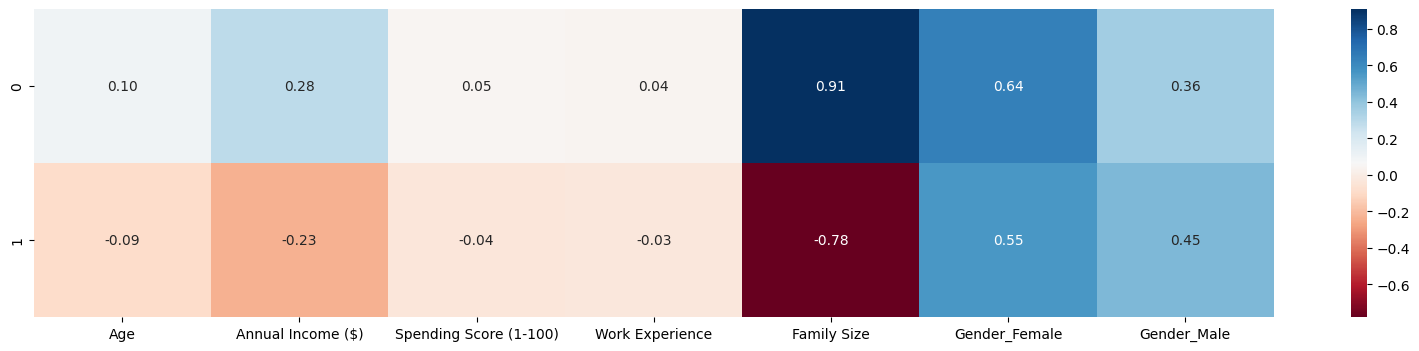

Silhouette Score = 0.14177878858044385 

## Number of Clusters = 3 

##Labels
0    688
1    657
2    585
Name: count, dtype: int64 



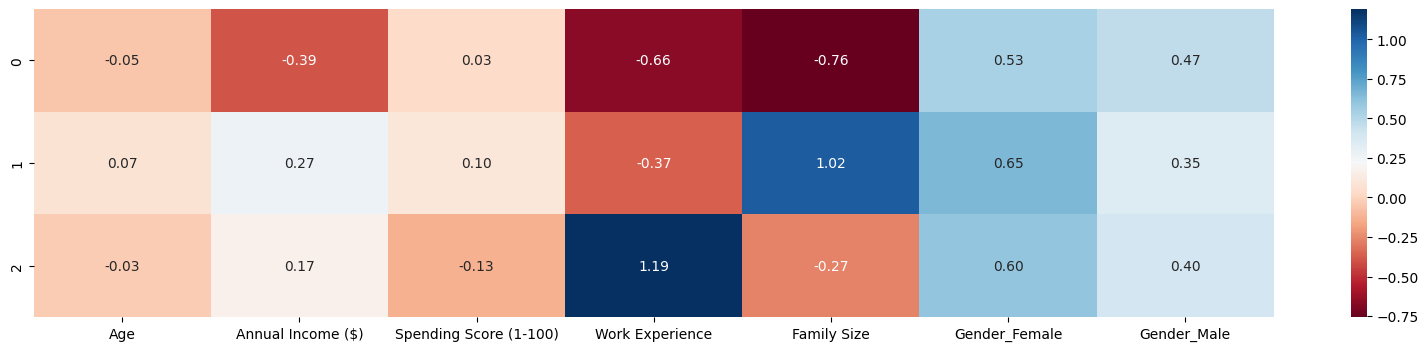

Silhouette Score = 0.13883919155337762 

## Number of Clusters = 4 

##Labels
0    506
1    483
3    481
2    460
Name: count, dtype: int64 



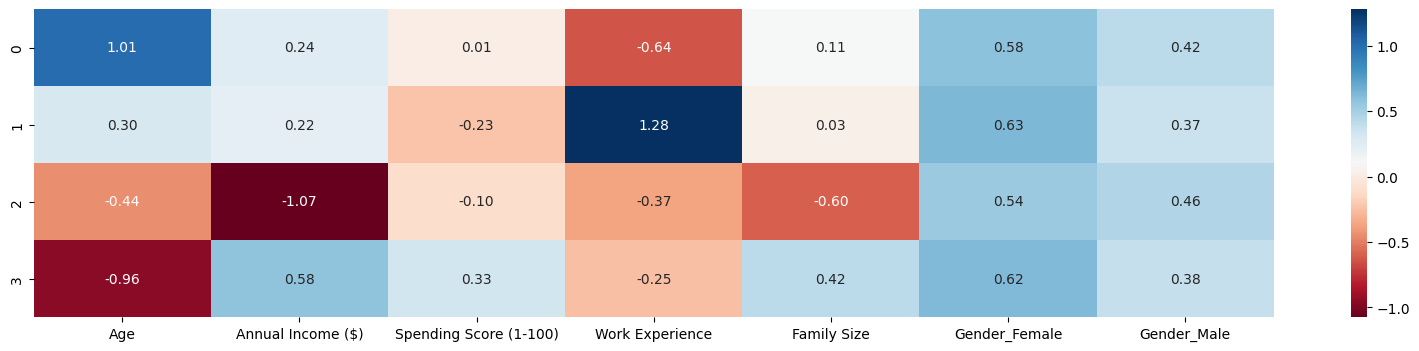

Silhouette Score = 0.13290484780490971 

## Number of Clusters = 5 

##Labels
3    405
4    394
1    384
2    379
0    368
Name: count, dtype: int64 



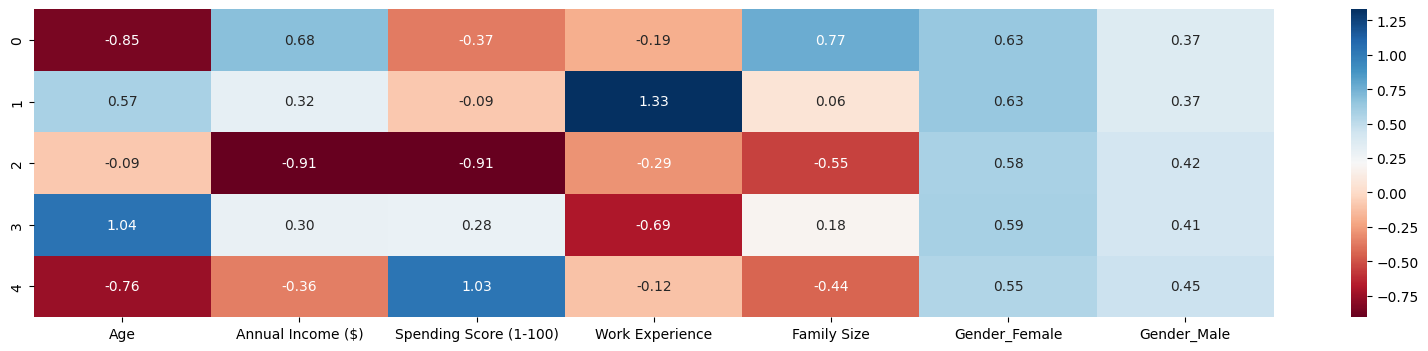

Silhouette Score = 0.13747082901419144 

## Number of Clusters = 6 

##Labels
3    338
5    337
4    336
0    325
1    315
2    279
Name: count, dtype: int64 



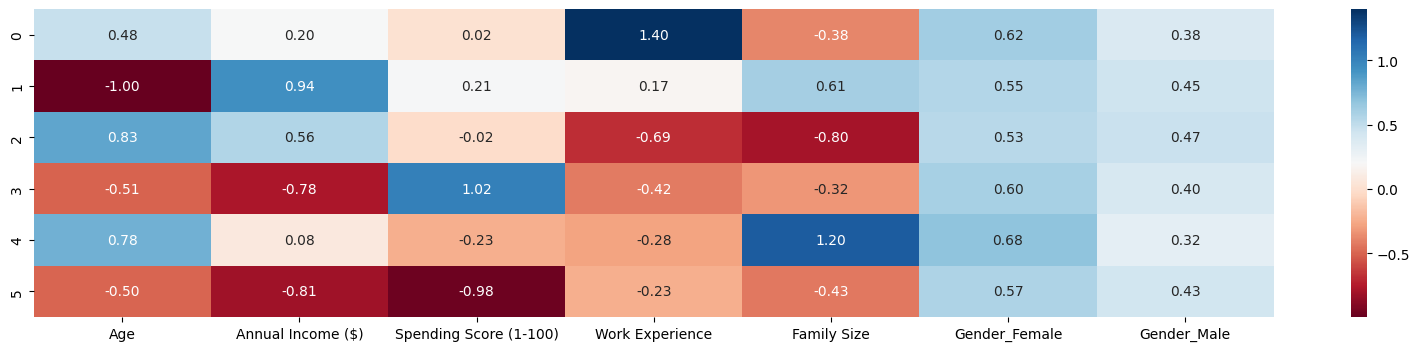

Silhouette Score = 0.13771910265306375 

## Number of Clusters = 7 

##Labels
5    315
1    296
6    290
2    289
0    277
4    254
3    209
Name: count, dtype: int64 



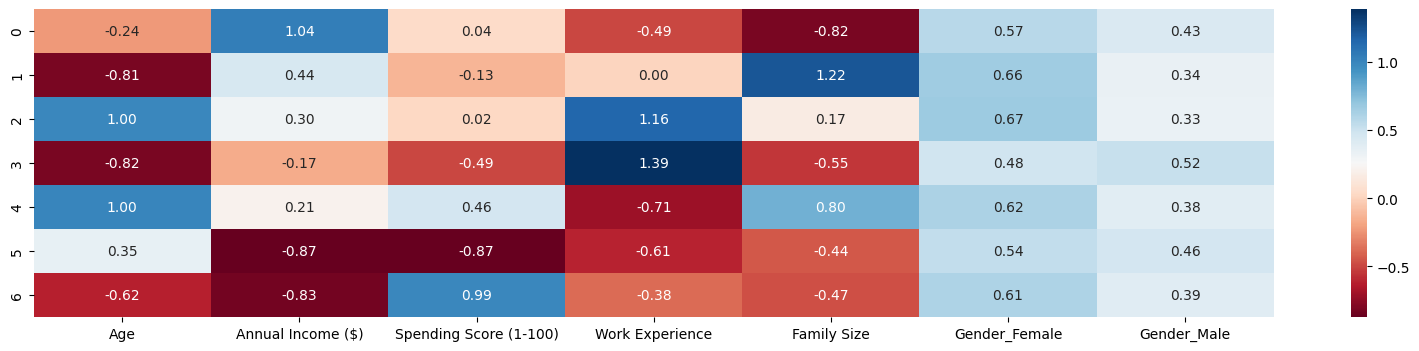

Silhouette Score = 0.14382753810269788 

## Number of Clusters = 8 

##Labels
1    266
7    261
0    256
3    250
2    243
5    220
4    218
6    216
Name: count, dtype: int64 



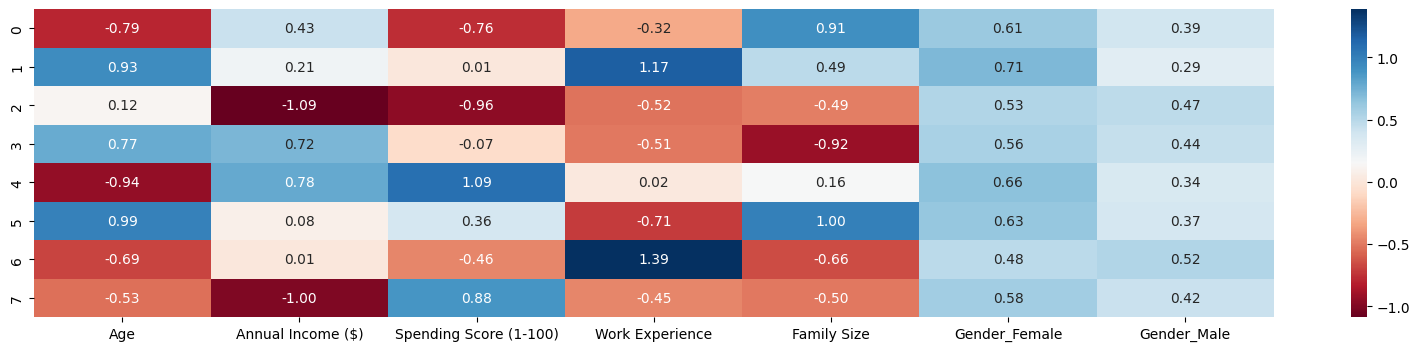

Silhouette Score = 0.13970971651661215 

## Number of Clusters = 9 

##Labels
6    257
3    236
1    230
2    217
4    214
5    211
8    199
7    183
0    183
Name: count, dtype: int64 



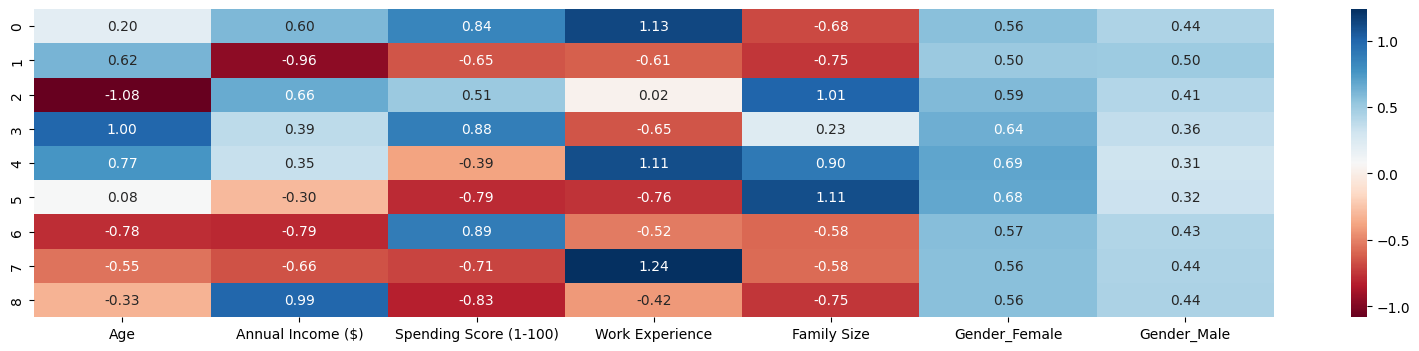

Silhouette Score = 0.15111377852774285 

## Number of Clusters = 10 

##Labels
7    254
1    218
4    207
3    196
8    192
0    186
9    177
6    170
2    168
5    162
Name: count, dtype: int64 



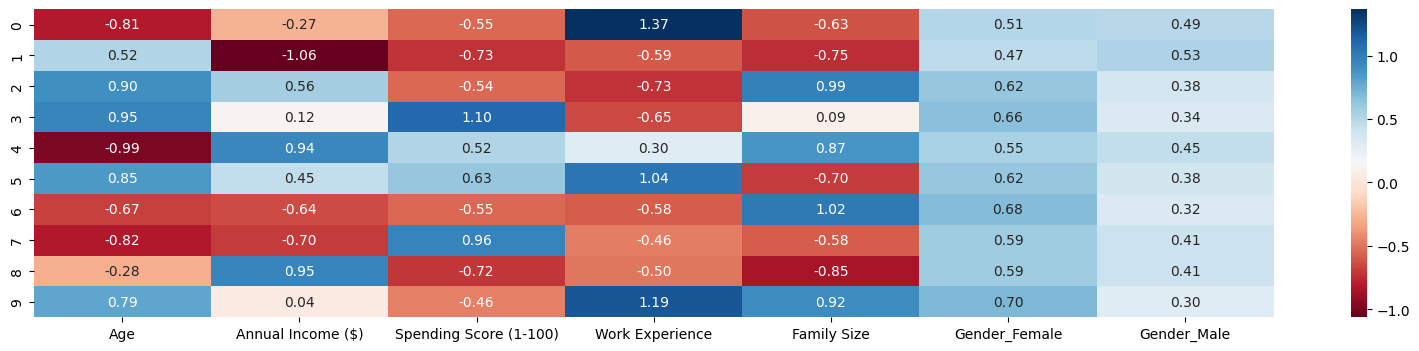

Silhouette Score = 0.1482418384537925 



In [50]:
k_mean_clustering(df3)

we are not getting any distinct customer segment except these two.

For n_clusters = 2

* **Cluster 1**: Old customers with high income, high spending score and more family members .
* **Cluster 2**: Young customers with low income, low spending score and few family members.

For n_clusters = 3

* **Cluster 1**: Median income with low spending score.
* **Cluster 2**: High income with median spending score.
* **Cluster 3**: Low income with high spending score.

We are getting very low `silhouette score` for all.

## Hierarchical Clustering (Without Profession Column)

## Number of clusters=2 

## Labels
0    1240
1     690
Name: count, dtype: int64 

Silhouette Score = 0.08920080882259092 



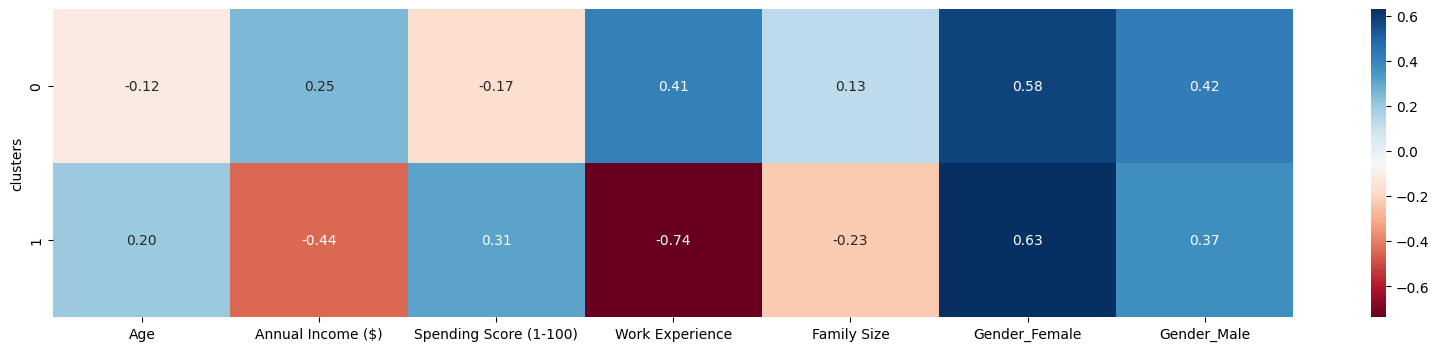

## Number of clusters=3 

## Labels
0    851
1    690
2    389
Name: count, dtype: int64 

Silhouette Score = 0.08645193261219865 



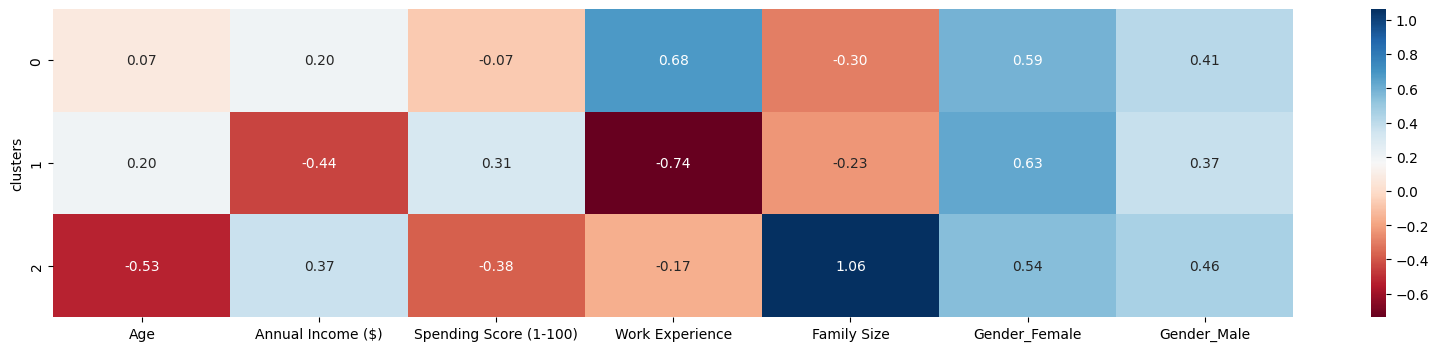

## Number of clusters=4 

## Labels
0    690
1    542
2    389
3    309
Name: count, dtype: int64 

Silhouette Score = 0.08898512034115576 



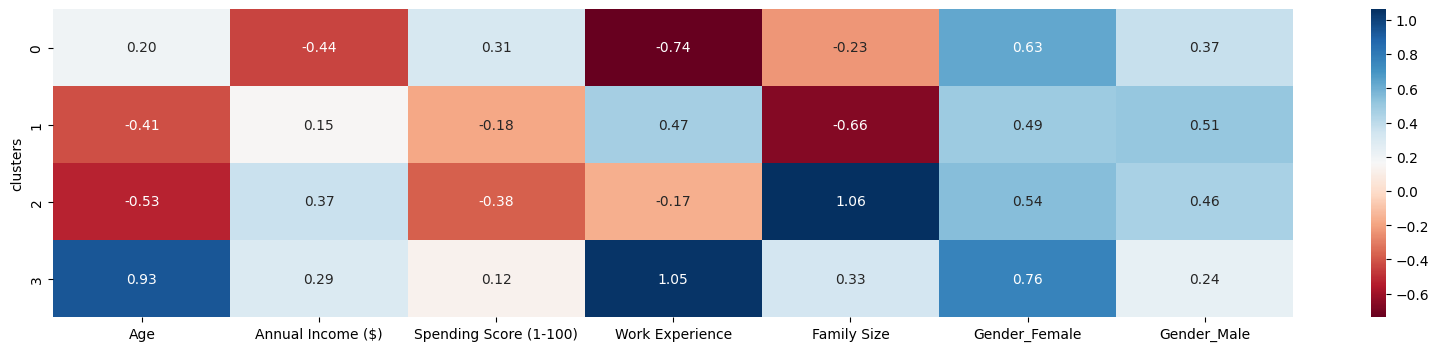

## Number of clusters=5 

## Labels
0    542
1    455
2    389
3    309
4    235
Name: count, dtype: int64 

Silhouette Score = 0.0824089027826496 



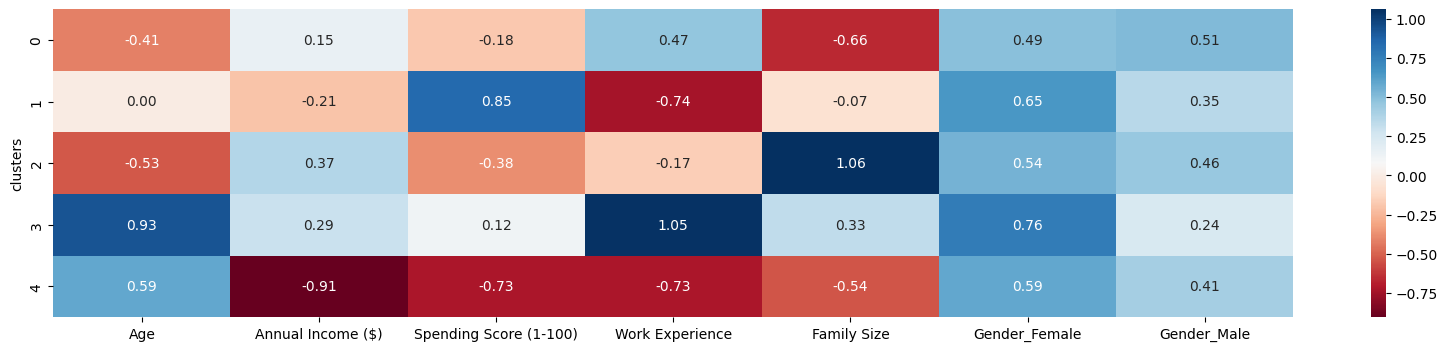

## Number of clusters=6 

## Labels
0    455
2    389
3    309
1    306
5    236
4    235
Name: count, dtype: int64 

Silhouette Score = 0.09205847854015428 



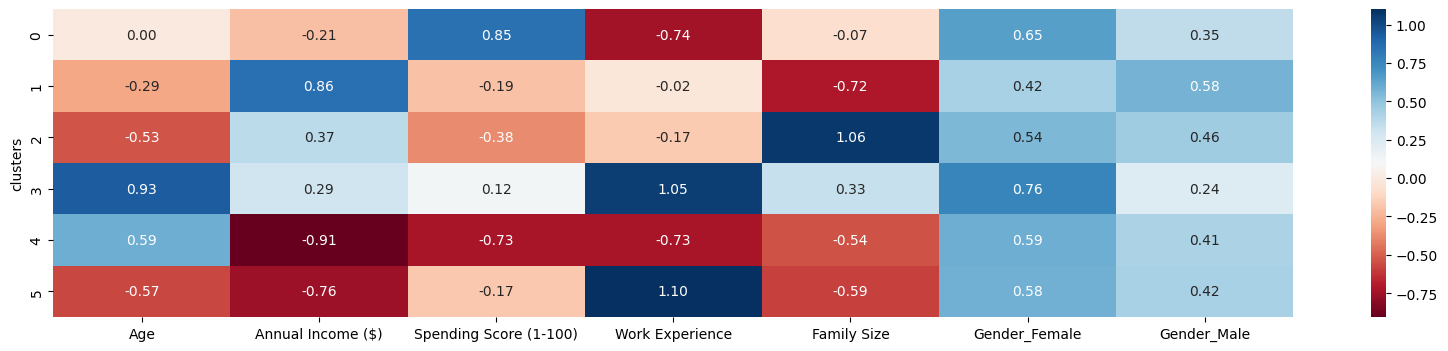

## Number of clusters=7 

## Labels
0    389
3    309
1    306
2    236
4    235
5    230
6    225
Name: count, dtype: int64 

Silhouette Score = 0.09297376873668148 



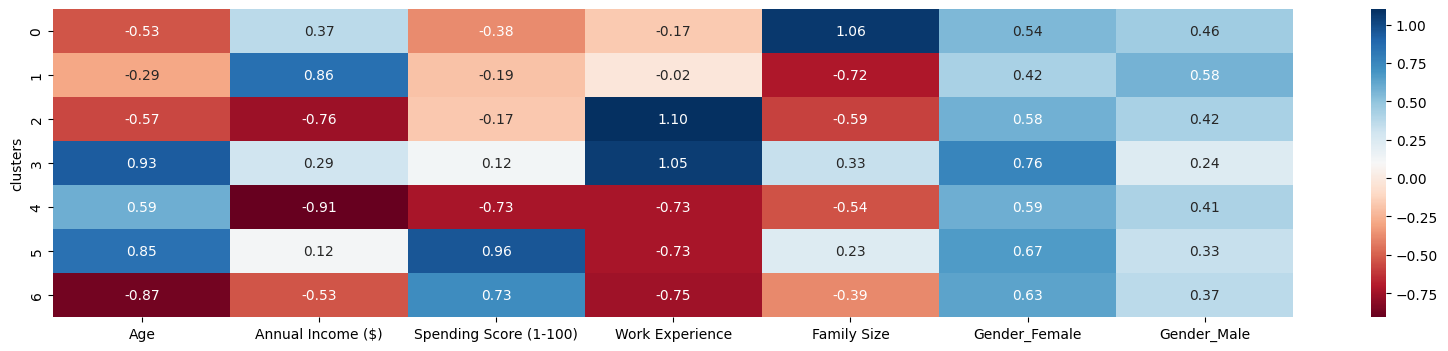

## Number of clusters=8 

## Labels
1    309
0    306
2    236
4    235
5    230
6    225
3    199
7    190
Name: count, dtype: int64 

Silhouette Score = 0.09655549234046236 



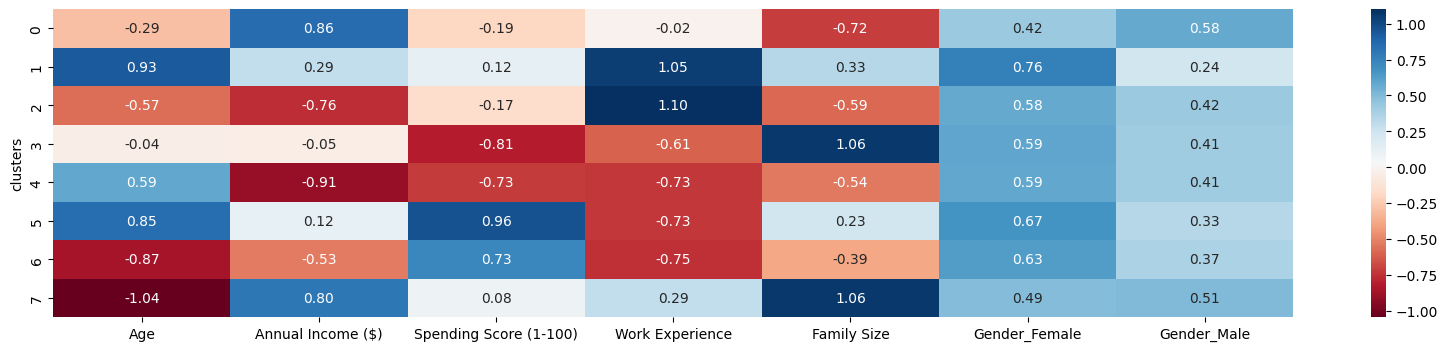

## Number of clusters=9 

## Labels
0    309
2    236
4    235
5    230
6    225
1    199
7    190
3    172
8    134
Name: count, dtype: int64 

Silhouette Score = 0.092948047747782 



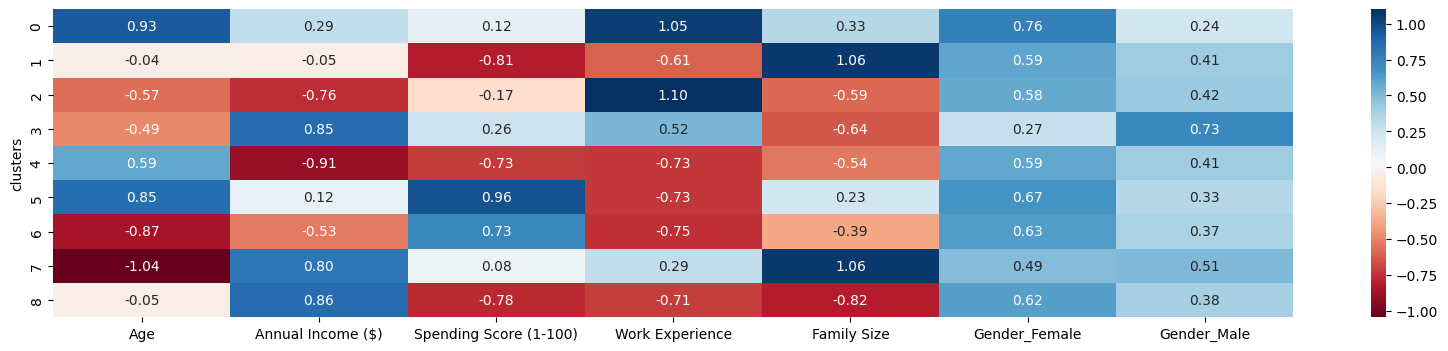

In [51]:
agg_clustering(df3)

* For `Hierarchical Clustering` also we are not getting distinct clusters.
* We are getting very low `silhouette score`.

## DBSCAN

In [52]:
def tune_dbscan(data):
    
    result = []
    
    eps_value = np.arange(0.1, 2, 0.1)
    min_sample_values = np.arange(2, 10, 1)
    
    for eps in eps_value:
        for samples in min_sample_values:
            dbscan = DBSCAN(eps=eps, min_samples=samples)
            dbscan.fit(scaled_df)
            labels = dbscan.labels_
            
            ## Number of clusters
            n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
            
            ## Number of noise
            n_noise = list(labels).count(-1)
            
            ## Silhouette Score 
            if n_clusters >1:  
                score = silhouette_score(scaled_df, labels, metric='euclidean', sample_size=None)
            else:
                score = None
                
            result.append([eps, samples, n_clusters, n_noise, score])
            
    result_df = pd.DataFrame(result, columns=['eps','min_sample','n_clusters', 'n_noise', 'silhouette_score'])
    return result_df        

In [53]:
result = tune_dbscan(scaled_df)
result.head()

eps  min_sample  n_clusters  n_noise  silhouette_score
0  0.1           2           0     1930               NaN
1  0.1           3           0     1930               NaN
2  0.1           4           0     1930               NaN
3  0.1           5           0     1930               NaN
4  0.1           6           0     1930               NaN

In [54]:
result.sort_values('silhouette_score', ascending=False).head()

eps  min_sample  n_clusters  n_noise  silhouette_score
145  1.9           3          20       40          0.269510
146  1.9           4          20       55          0.262639
137  1.8           3          21       60          0.261786
144  1.9           2          25       30          0.258992
147  1.9           5          20       77          0.256803

* DBSCAN model also not working good.
* We are getting the best silhouette score for 20 clusters and 20 clusters are very large number so we can't consider this.

WE have two solutions:
* 1. Clusters using all variables.
* 2. Clusters without using `profession` variable.


**Clusters using all variables**

We have used different number of clusters to check distinct customers segmentation and we got distinct clusters for 2 and 8 number of clusters.
I have checked `silhouette score` for each and got best score for 8 clusters.
I was able to interpret 2 and 8 clusters that are below:

For n_clusters = 2:
* **Cluster 1** : Female customers with more spending score, having low income and Artists, Homemakers, Lawyers and Marketing Professions.
* **Cluster 2** : Men customers with high income, having big family size and Doctor, Engineer, Entert., Executive and Healthcare Professions.

For n_clusters = 8:
* **Cluster 1**: Female Artist with median income, age and family
* **Cluster 2**: Healthcare profession's men with above average income, good spending score and low age.
* **Cluster 3**: Engineers and Homemakers with low income and spending score.
* **Cluster 4**: Old male doctors with low income and fewer family members.
* **Cluster 5**: Male entertainment professionals with high income & spending score and less work experience & family members.
* **Cluster 6**: Male executives with more work experience and age.
* **Cluster 7**: Marketing women with high income and spending score.
* **Cluster 8**: Women Lawyers with low income but high spending score.

`Data is clustered by each profession for n_clusters = 8`


**Clusters without using `profession` variable**

Here, I dropped `profession` column because cluster was creating by profession. Here are the clusters:

For n_clusters = 2

* **Cluster 1**: Old customers with high income, high spending score and more family members .
* **Cluster 2**: Young customers with low income, low spending score and few family members.

For n_clusters = 3

* **Cluster 1**: Median income with low spending score.
* **Cluster 2**: High income with median spending score.
* **Cluster 3**: Low income with high spending score.

We will choose as per our requirement